#**CHAPTER 1. GOVERNED USNUPERVISED LEARNING**
---

##0.REFERENCE

https://claude.ai/share/3ae8721b-e274-4227-98f0-a26492d56a1c

##1.CONTEXT

**Introduction: Governed Machine Learning for Unsupervised Pattern Discovery**

**Why Governance Matters Before You Even Start**

Welcome to Chapter 1 of "Governed Machine Learning: A Foundation Before Generative AI." This notebook introduces you to a fundamental tension in modern analytics: as our models become more sophisticated, our ability to explain, audit, and control them often deteriorates. This is not a theoretical concern—it is a practical reality that has cost organizations millions in regulatory fines, reputational damage, and lost customer trust.

You might wonder why we need governance for something as simple as clustering algorithms. After all, K-Means and hierarchical clustering have been taught in statistics courses for decades. They are unsupervised methods, meaning they do not make predictions about individuals or recommend specific actions. They simply find patterns. What could go wrong?

The answer is: almost everything. Consider a financial services firm that runs a clustering algorithm on customer transaction data and discovers three distinct segments. Without governance, an analyst might label these clusters as "high value," "moderate value," and "low value" customers. Marketing receives these labels and begins differential treatment—better interest rates for the "high value" segment, reduced service quality for the "low value" group. Six months later, the firm discovers that the clustering algorithm inadvertently segmented customers along demographic lines that correlate with protected characteristics. The "low value" cluster disproportionately contains customers from specific zip codes and ethnic backgrounds. What began as a simple exploratory analysis has become a fair lending violation with potential legal and regulatory consequences.

This scenario is not hypothetical. Variations of it have occurred repeatedly across industries—banking, insurance, healthcare, retail—wherever organizations deploy machine learning without appropriate controls. The problem is not that clustering algorithms are inherently biased or dangerous. The problem is that organizations treat exploratory models as if they have no consequences, when in reality, every analytical output can influence decisions, shape narratives, and affect people's lives.

**The Core Thesis: Capability, Risk, and Controls Must Scale Together**

This notebook implements a principle that will recur throughout this course: **as model capability increases, risk increases, and therefore controls must increase proportionally.** Even simple models require governance. The difference between simple and complex models is not whether governance is needed—it is the specific controls that must be deployed.

Unsupervised learning presents unique governance challenges. Unlike supervised learning, where we have ground truth labels to validate predictions, clustering algorithms produce outputs with no external reference point. The clusters are mathematical constructs—regions of feature space where data points are similar to each other and dissimilar to points in other regions. Whether these mathematical constructs correspond to meaningful business concepts is a question that cannot be answered by the algorithm itself. This is where human judgment, domain expertise, and governance frameworks become essential.

The notebook you are about to run implements a complete governed workflow for two clustering methods: K-Means and hierarchical clustering. Every step—from data validation to stability testing to final documentation—follows deterministic rules that ensure reproducibility, auditability, and appropriate constraint on interpretation.

**What This Notebook Demonstrates: Governance Architecture for Simple Models**

This implementation showcases several governance principles that apply regardless of model complexity:

**Fail-Closed by Default:** The notebook validates data against a declared schema before any modeling begins. If validation fails—if data types are incorrect, if values fall outside expected ranges, if required columns are missing—the entire execution stops. This is not a warning or a suggestion; it is an enforcement mechanism. No analysis proceeds on invalid data. This principle mirrors how production systems in regulated industries must operate: when data integrity cannot be verified, the system must not produce outputs that could inform decisions.

**Deterministic Controls Over Discretionary Judgments:** Every threshold, every decision criterion, every abstention rule is declared in advance in a configuration file. The stability threshold (0.70 in this implementation) is not chosen during analysis based on what "looks good." It is set before execution and applied uniformly. If a model's stability score falls below this threshold, interpretation is automatically blocked. This removes analyst discretion at the point where discretion is most dangerous—after seeing the results.

**Separation of Facts and Hypotheses:** The notebook enforces a strict boundary between what the model actually found (facts) and what those findings might mean (hypotheses). Facts include: "Cluster 0 contains 40% of observations with mean purchase frequency of 18.3." Hypotheses include: "Cluster 0 may represent highly engaged customers." The notebook never allows hypotheses to be stated as facts. Every interpretation is labeled as requiring validation. This seemingly pedantic distinction prevents the gradual transformation of uncertain patterns into confident business narratives—a transformation that occurs unconsciously in most analytical workflows.

**Comprehensive Audit Trail:** Every run generates a complete artifact bundle containing not just the results, but the entire provenance: configuration hash, environment fingerprint, data schema, validation logs, stability test results, risk assessments, and governance documentation. If someone reviews this analysis in six months and questions a finding, they can trace exactly what was done, with what data, under what constraints, and with what caveats.

**Mandatory Abstention Gates:** Not all model outputs deserve interpretation. If a clustering solution is unstable—if running the same algorithm with minor perturbations produces substantially different results—then the patterns are not reliable enough to form the basis of business hypotheses. The notebook implements stability testing through multiple mechanisms: different random seeds for K-Means, alternative linkage methods for hierarchical clustering, and bootstrap resampling for both. If stability scores fall below the threshold, the notebook explicitly marks interpretation as "not allowed" and records this decision in the artifact bundle.

**Built-In Boundary Enforcement:** The notebook includes explicit refusal logic. If a user attempts to ask "which cluster is highest value?" or "use these clusters for targeting," the notebook documents this as a boundary violation. This is not just a philosophical stance; it is a practical recognition that model outputs often escape their original context. An exploratory clustering analysis gets shared in a slide deck, the caveats get dropped, and suddenly marketing is using cluster labels for campaign targeting without any validation. By building refusal logic into the notebook itself, we create a documented record that certain uses were explicitly prohibited from the start.

**Main Contributions: What Makes This Approach Different**

Traditional machine learning education treats governance as an afterthought—something to consider "later" when models go into production. This approach is backwards. Governance should be designed into the analytical workflow from the beginning, even for exploratory analyses. This notebook demonstrates what that looks like in practice.

The first contribution is the concept of "governed capsules"—self-contained analytical units that include not just the modeling code, but also the validation, stability testing, risk assessment, and documentation required to make that modeling defensible. Each capsule follows the same internal structure: initialize, validate, fit, test stability, enforce abstention gates, document risks, generate artifacts. This structure is repeatable and scalable. Whether you are fitting K-Means or training a neural network, the same governance workflow applies.

The second contribution is the emphasis on stability as a prerequisite for interpretation. Most clustering analyses report metrics like silhouette scores or within-cluster variance but ignore stability. Yet stability is arguably more important than any point-estimate quality metric. A clustering solution with a moderate silhouette score but high stability (consistent results across perturbations) is more trustworthy than a solution with a high silhouette score but low stability (results that change dramatically with minor variations). This notebook treats stability testing as non-negotiable and implements abstention when stability is insufficient.

The third contribution is the structured separation of facts, assumptions, open items, and questions in the governance memo. This format forces analytical rigor. You cannot simply write a narrative interpretation; you must explicitly state what is known (facts), what is believed but unverified (assumptions), what remains to be investigated (open items), and what specific questions a reviewer should validate (questions to verify). This structure prevents the casual elision of uncertainty that characterizes most analytical reports.

The fourth contribution is the comprehensive artifact bundle that makes every analysis reproducible. Configuration hashing ensures that if you run this notebook twice with the same configuration, you get identical results. Environment fingerprinting ensures that you know exactly what software versions were used. Split manifests ensure that you can reconstruct exactly how data was partitioned for stability testing. This level of reproducibility is standard in academic research but rare in business analytics. This notebook demonstrates that reproducibility is achievable without excessive overhead.

**Real-World Applications: Where This Governance Approach Adds Value**

Financial institutions operating under regulatory oversight can use this approach to demonstrate due diligence in exploratory analyses. When a regulator asks "how did you arrive at these customer segments?" the answer is not "we ran a clustering algorithm." The answer is: here is the artifact bundle containing the complete audit trail, here is the stability report showing these patterns are reliable, here is the risk log documenting potential concerns, here is the governance memo separating facts from hypotheses, and here is the model card explaining limitations and required human oversight.

Credit risk teams can use governed clustering to explore patterns in loan applications or transaction behaviors without prematurely labeling those patterns as risk indicators. The abstention gates prevent unstable patterns from influencing downstream decisions. The boundary enforcement prevents exploratory clusters from being used directly for underwriting or pricing without proper validation.

Marketing analytics teams can use this approach to identify customer segments for hypothesis generation while maintaining clear documentation that these segments are exploratory constructs, not operational categories. The governance memo provides the framework for discussing what additional validation would be required before using these segments for targeting or personalization.

Compliance and audit teams can use the artifact bundles to review analytical workflows retrospectively. Instead of trying to reconstruct what an analyst did from scattered notebooks and memory, they have a complete, timestamped record of every decision, every threshold, every risk consideration.

MBA and MFin students can use this notebook to understand what "responsible AI" means in practice—not vague principles, but concrete implementations of validation, testing, documentation, and constraint. This is the level of rigor that sophisticated financial institutions increasingly expect from their analytical staff.

**What You Will Learn By Running This Notebook**

By the end of this notebook, you will have generated a complete governed clustering analysis with full audit trail. You will understand the difference between running an algorithm and implementing a governed analytical workflow. You will see how deterministic rules can enforce analytical discipline without stifling exploration. You will learn to separate mathematical findings from business interpretations. You will understand why stability matters more than most quality metrics. And you will have a template for how to approach any exploratory analysis—regardless of model complexity—with appropriate governance from the start.

The governance architecture in this notebook scales. The same principles—schema validation, stability testing, abstention gates, risk documentation, artifact generation—apply whether you are clustering customer data, building credit scorecards, training fraud detection models, or deploying large language models. The specific tests change, the thresholds change, the complexity changes, but the governance workflow remains constant.

This is governed machine learning. Not machine learning with governance added as an afterthought, but machine learning where governance is integral to the analytical process from the first line of code.

Welcome to Chapter 1. Let us begin.

##2.LIBRARIES AND ENVIRONMENT

In [3]:
# CELL 2: Install + Imports + Global Config

import os
import json
import hashlib
import time
import platform
import sys
import random
from datetime import datetime
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import zipfile

# ============================================================================
# GLOBAL CONFIGURATION
# ============================================================================
GLOBAL_CONFIG = {
    "seed": 42,
    "n_samples": 500,
    "feature_specs": {
        "purchase_frequency": {"mean": 12, "std": 8, "min": 0, "max": 50},
        "avg_transaction_value": {"mean": 150, "std": 80, "min": 10, "max": 500},
        "account_age_months": {"mean": 24, "std": 15, "min": 1, "max": 60},
        "engagement_score": {"mean": 50, "std": 20, "min": 0, "max": 100}
    },
    "kmeans_k": 3,
    "hierarchical_linkage": "ward",
    "hierarchical_metric": "euclidean",
    "stability_threshold": 0.70,
    "stability_iterations": 5
}

# Set all seeds deterministically
np.random.seed(GLOBAL_CONFIG["seed"])
random.seed(GLOBAL_CONFIG["seed"])

# ============================================================================
# HELPER FUNCTIONS
# ============================================================================

def stable_json_dump(path, obj):
    """Write JSON with stable formatting"""
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, 'w', encoding='utf-8') as f:
        json.dump(obj, f, indent=2, sort_keys=True, ensure_ascii=False)

def sha256_file(path):
    """Compute SHA-256 hash of file"""
    sha256 = hashlib.sha256()
    with open(path, 'rb') as f:
        for chunk in iter(lambda: f.read(4096), b""):
            sha256.update(chunk)
    return sha256.hexdigest()

def sha256_dict(obj):
    """Compute SHA-256 hash of dictionary"""
    json_str = json.dumps(obj, sort_keys=True, ensure_ascii=False)
    return hashlib.sha256(json_str.encode('utf-8')).hexdigest()

print("✓ Configuration loaded and seeds set")
print(f"  Seed: {GLOBAL_CONFIG['seed']}")
print(f"  Samples: {GLOBAL_CONFIG['n_samples']}")
print(f"  K-Means clusters: {GLOBAL_CONFIG['kmeans_k']}")

✓ Configuration loaded and seeds set
  Seed: 42
  Samples: 500
  K-Means clusters: 3


##3.INITIALIZATION AND FOLDER LAYOUT

###3.1.OVERVIEW

**Cell 3: Run Initialization and Directory Structure**

This cell establishes the foundational infrastructure for governance by creating a unique, reproducible run identifier and comprehensive artifact directory structure. The run ID combines a timestamp with a deterministic suffix derived from the configured seed, ensuring traceability while maintaining reproducibility. This design allows multiple runs to coexist without conflicts while enabling exact replication when needed.

The cell creates a systematic folder hierarchy mirroring the governance workflow: schemas for data definitions, validation for quality checks, split for data partitioning records, metrics for performance measures, reports for stability and guardrail assessments, model for documentation, decision for gate outcomes, risk for event logging, memo for structured analysis, and outputs for deliverables. This organization ensures every governance artifact has a designated location, preventing the scattered documentation that plagues most analytical projects.

Environment fingerprinting captures the complete computational context—Python version, platform details, and package versions for numpy, pandas, and scikit-learn. This fingerprint becomes part of the permanent record, ensuring that anyone reviewing this analysis knows exactly what software environment produced these results. Combined with configuration hashing, which creates a cryptographic digest of all parameters and key environment details, we achieve true reproducibility: identical configurations in identical environments must produce identical results.

The cell initializes placeholder files for risk logging and decision recording, pre-populating them with the run identifier and "Not verified" status. This proactive approach ensures these critical governance artifacts exist from the start, preventing the common failure mode where risk assessment happens only after problems emerge. Every file location is recorded in the run manifest, creating a complete map of the artifact bundle. This manifest becomes the single source of truth for understanding what this run produced and where to find each component. The governance architecture is now ready to receive validation results, modeling outputs, and documentation.

###3.2.CODE AND IMPLEMENTATION

In [4]:
# CELL 3: Run Initialization + Folder Layout + Run Manifest

# ============================================================================
# CREATE RUN ID AND DIRECTORY STRUCTURE
# ============================================================================

# Create deterministic run_id (timestamp + seed-based suffix)
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
suffix = hashlib.sha256(str(GLOBAL_CONFIG["seed"]).encode()).hexdigest()[:8]
run_id = f"run_{timestamp}_{suffix}"

# Create directory structure
base_path = f"./artifacts/{run_id}"
artifact_dirs = [
    "schemas",
    "validation",
    "split",
    "metrics",
    "reports",
    "model",
    "decision",
    "risk",
    "memo",
    "outputs"
]

for dir_name in artifact_dirs:
    os.makedirs(os.path.join(base_path, dir_name), exist_ok=True)

# ============================================================================
# CAPTURE ENVIRONMENT FINGERPRINT
# ============================================================================

env_fingerprint = {
    "python_version": sys.version,
    "platform": platform.platform(),
    "numpy_version": np.__version__,
    "pandas_version": pd.__version__,
    "sklearn_version": __import__('sklearn').__version__
}

# Compute config hash
config_hash = sha256_dict({
    "config": GLOBAL_CONFIG,
    "env_subset": {
        "python": sys.version.split()[0],
        "numpy": np.__version__,
        "sklearn": __import__('sklearn').__version__
    }
})

# ============================================================================
# WRITE RUN MANIFEST
# ============================================================================

run_manifest = {
    "run_id": run_id,
    "timestamp": timestamp,
    "config": GLOBAL_CONFIG,
    "config_hash": config_hash,
    "environment_fingerprint": env_fingerprint,
    "artifact_paths": {
        "run_manifest": f"{base_path}/run_manifest.json",
        "data_schema": f"{base_path}/schemas/data_schema.json",
        "data_validation_log": f"{base_path}/validation/data_validation_log.json",
        "split_manifest": f"{base_path}/split/split_manifest.json",
        "baseline_metrics": f"{base_path}/metrics/baseline_metrics.json",
        "eval_metrics": f"{base_path}/metrics/eval_metrics.json",
        "stability_report": f"{base_path}/reports/stability_report.json",
        "guardrails_report": f"{base_path}/reports/guardrails_report.json",
        "model_card": f"{base_path}/model/model_card.json",
        "decision": f"{base_path}/decision/decision.json",
        "risk_log": f"{base_path}/risk/risk_log.json",
        "governance_memo": f"{base_path}/memo/governance_memo.json",
        "sample_outputs": f"{base_path}/outputs/sample_outputs.json",
        "artifacts_bundle": f"{base_path}/artifacts_bundle.zip"
    }
}

stable_json_dump(f"{base_path}/run_manifest.json", run_manifest)

# Initialize placeholder files
stable_json_dump(f"{base_path}/risk/risk_log.json", {
    "run_id": run_id,
    "timestamp": timestamp,
    "risk_events": [],
    "verification_status": "Not verified"
})

stable_json_dump(f"{base_path}/decision/decision.json", {
    "run_id": run_id,
    "overall_status": "pending",
    "verification_status": "Not verified",
    "required_human_review": True
})

print(f"✓ Run initialized: {run_id}")
print(f"  Base path: {base_path}")
print(f"  Config hash: {config_hash[:16]}...")

✓ Run initialized: run_20260130_215322_73475cb4
  Base path: ./artifacts/run_20260130_215322_73475cb4
  Config hash: e3c2cc863be75e7f...


##4.SYNTHETIC DATA GENERATOR

###4.1.OVERVIEW

**Cell 4: Synthetic Data Generation with Schema Documentation**

This cell generates synthetic customer behavioral data while simultaneously documenting its complete schema with provenance metadata. The data generation process creates realistic patterns by simulating three underlying customer archetypes with correlated features, ensuring the dataset contains meaningful structure for clustering algorithms to discover. This approach mimics real-world scenarios where customer behaviors cluster naturally due to underlying behavioral patterns.

The synthetic data includes four features representing common business metrics: purchase frequency, average transaction value, account age, and engagement score. These features are deliberately correlated—for instance, purchase frequency influences transaction value through a correlation factor, and archetype membership affects engagement scores. This correlation structure creates natural clustering tendency while maintaining plausible business relationships. The synthetic approach eliminates privacy concerns and regulatory constraints, allowing students to practice governance workflows without accessing sensitive real-world data.

The schema documentation goes far beyond simple data type specifications. For each feature, we record not just the observed statistics (mean, standard deviation, min, max, missing count) but also the provenance metadata: source, rationale, and constraints. This provenance documentation answers critical questions that arise during model review: Where did this feature come from? Why was it included? What constraints should it satisfy? This level of documentation is essential in professional settings where model reviewers need to understand not just what data was used, but why and how it was collected.

The schema serves as a contract between data generation and validation. By declaring expected ranges, data types, and missingness rules explicitly, we establish criteria for the validation step that follows. This contract prevents scope creep where validation rules change based on observed data. The schema is written to the artifacts directory as a permanent record, ensuring that anyone reviewing this analysis understands exactly what data properties were expected and required.

###4.2.CODE AND IMPLEMENTATION

In [5]:
# CELL 4: Synthetic Data Generator + Schema Definition

# ============================================================================
# GENERATE SYNTHETIC DATA
# ============================================================================

def generate_synthetic_data(config):
    """Generate synthetic customer behavior data with documented schema"""

    np.random.seed(config["seed"])
    n = config["n_samples"]
    specs = config["feature_specs"]

    # Generate correlated features to create natural clustering structure
    # Create three underlying customer archetypes
    archetype = np.random.choice([0, 1, 2], size=n, p=[0.4, 0.35, 0.25])

    data = {}

    # Purchase frequency (influenced by archetype)
    base_freq = np.random.normal(specs["purchase_frequency"]["mean"],
                                  specs["purchase_frequency"]["std"], n)
    archetype_adj = np.array([5, 0, -8])[archetype]
    data["purchase_frequency"] = np.clip(base_freq + archetype_adj,
                                         specs["purchase_frequency"]["min"],
                                         specs["purchase_frequency"]["max"])

    # Average transaction value (correlated with frequency)
    base_value = np.random.normal(specs["avg_transaction_value"]["mean"],
                                   specs["avg_transaction_value"]["std"], n)
    freq_correlation = (data["purchase_frequency"] - 12) * 2.5
    data["avg_transaction_value"] = np.clip(base_value + freq_correlation,
                                            specs["avg_transaction_value"]["min"],
                                            specs["avg_transaction_value"]["max"])

    # Account age (slight correlation with engagement)
    data["account_age_months"] = np.clip(
        np.random.normal(specs["account_age_months"]["mean"],
                        specs["account_age_months"]["std"], n),
        specs["account_age_months"]["min"],
        specs["account_age_months"]["max"]
    )

    # Engagement score (correlated with purchase patterns)
    base_engagement = np.random.normal(specs["engagement_score"]["mean"],
                                       specs["engagement_score"]["std"], n)
    engagement_adj = np.array([15, -5, -10])[archetype]
    data["engagement_score"] = np.clip(base_engagement + engagement_adj,
                                       specs["engagement_score"]["min"],
                                       specs["engagement_score"]["max"])

    df = pd.DataFrame(data)

    # Define schema with provenance metadata
    schema = {
        "columns": list(df.columns),
        "n_rows": len(df),
        "features": {}
    }

    for col in df.columns:
        schema["features"][col] = {
            "dtype": str(df[col].dtype),
            "min": float(df[col].min()),
            "max": float(df[col].max()),
            "mean": float(df[col].mean()),
            "std": float(df[col].std()),
            "missing_count": int(df[col].isna().sum()),
            "source": "synthetic_generator",
            "rationale": f"Simulated customer behavior metric for exploratory analysis",
            "constraints": {
                "range_min": specs[col]["min"],
                "range_max": specs[col]["max"]
            }
        }

    return df, schema

# Generate data
df, schema_json = generate_synthetic_data(GLOBAL_CONFIG)

# Write schema
stable_json_dump(f"{base_path}/schemas/data_schema.json", schema_json)

print(f"✓ Synthetic data generated: {len(df)} rows, {len(df.columns)} features")
print(f"  Features: {list(df.columns)}")
print(f"\nData preview:")
print(df.head())

✓ Synthetic data generated: 500 rows, 4 features
  Features: ['purchase_frequency', 'avg_transaction_value', 'account_age_months', 'engagement_score']

Data preview:
   purchase_frequency  avg_transaction_value  account_age_months  \
0           19.734048             216.049374           43.526119   
1           19.009367             138.780050           47.422668   
2           19.603391             216.260863           24.480062   
3            7.384771             227.158213           12.698732   
4            9.812683             210.170281           30.899582   

   engagement_score  
0         48.807930  
1         48.481221  
2         35.523213  
3         44.710955  
4         75.925685  


##5.DATA VALIDATION AND SPLIT MANIFEST

###5.1.OVERVIEW

**Cell 5: Deterministic Data Validation and Split Manifest Creation**

This cell implements fail-closed validation, the first critical governance gate in the workflow. The validation function systematically checks the dataframe against the declared schema using four rule categories: column presence (are all expected columns present and no unexpected columns included), data type conformity (do columns have the expected numeric types), range validation (do values fall within declared constraints), and missingness checks (are there any null values where none are expected). Each rule is evaluated independently and logged with pass/fail status, creating a complete audit trail of data quality checks.

The fail-closed enforcement mechanism is crucial to understanding governance philosophy. If any validation rule fails, the notebook does not proceed with warnings or caveats—it stops completely. A decision record is written documenting that execution was blocked due to schema validation failure, and the Python interpreter exits. This harsh approach reflects professional practice in regulated environments: invalid data cannot be allowed to flow through analytical pipelines, regardless of time pressure or analytical curiosity. The cost of proceeding with invalid data—incorrect results influencing decisions—far exceeds the cost of stopping and fixing data quality issues.

After successful validation, the cell creates a split manifest documenting how data is partitioned for analysis. For unsupervised learning, we define an analysis split (the full dataset) and multiple stability splits (bootstrap resamples with replacement). Each split is documented with its indices and a cryptographic hash, enabling exact reproduction of any subset. This documentation answers a critical question in model review: which specific data points were used for which purpose?

The split manifest approach scales to supervised learning contexts where train/test/validation splits would be documented similarly. By recording data partitioning decisions explicitly and hashing the resulting subsets, we prevent the common problem where analysts cannot reconstruct which data went into which model evaluation. This level of reproducibility distinguishes professional analytical practice from exploratory coding.

###5.2.CODE AND IMPLEMENTATION

In [8]:
# CELL 5: Data Validation + Split Manifest

# ============================================================================
# VALIDATE DATA AGAINST SCHEMA
# ============================================================================

def validate_data(df, schema):
    """Validate dataframe against schema with deterministic rules"""

    validation_log = {
        "run_id": run_id,
        "timestamp": datetime.now().isoformat(),
        "rules": [],
        "overall_status": "pass"
    }

    # Rule 1: Column presence
    expected_cols = set(schema["columns"])
    actual_cols = set(df.columns)

    validation_log["rules"].append({
        "rule_id": "R001",
        "rule_name": "column_presence",
        "status": "pass" if expected_cols == actual_cols else "fail",
        "expected": list(expected_cols),
        "actual": list(actual_cols),
        "missing": list(expected_cols - actual_cols),
        "extra": list(actual_cols - expected_cols)
    })

    if expected_cols != actual_cols:
        validation_log["overall_status"] = "fail"

    # Rule 2: Data types
    for col in df.columns:
        if col in schema["features"]:
            expected_dtype = schema["features"][col]["dtype"]
            actual_dtype = str(df[col].dtype)

            validation_log["rules"].append({
                "rule_id": f"R002_{col}",
                "rule_name": f"dtype_check_{col}",
                "status": "pass" if "float" in actual_dtype or "int" in actual_dtype else "fail",
                "expected": expected_dtype,
                "actual": actual_dtype
            })

            if not ("float" in actual_dtype or "int" in actual_dtype):
                validation_log["overall_status"] = "fail"

    # Rule 3: Range validation
    for col in df.columns:
        if col in schema["features"]:
            constraints = schema["features"][col]["constraints"]
            min_val = df[col].min()
            max_val = df[col].max()

            range_valid = (min_val >= constraints["range_min"] and
                          max_val <= constraints["range_max"])

            validation_log["rules"].append({
                "rule_id": f"R003_{col}",
                "rule_name": f"range_check_{col}",
                "status": "pass" if range_valid else "fail",
                "actual_min": float(min_val),
                "actual_max": float(max_val),
                "expected_min": constraints["range_min"],
                "expected_max": constraints["range_max"]
            })

            if not range_valid:
                validation_log["overall_status"] = "fail"

    # Rule 4: Missingness check
    for col in df.columns:
        if col in schema["features"]:
            missing_count = df[col].isna().sum()

            validation_log["rules"].append({
                "rule_id": f"R004_{col}",
                "rule_name": f"missingness_check_{col}",
                "status": "pass" if missing_count == 0 else "fail",
                "missing_count": int(missing_count),
                "missing_pct": float(missing_count / len(df) * 100)
            })

            if missing_count > 0:
                validation_log["overall_status"] = "fail"

    return validation_log

# Perform validation
validation_log = validate_data(df, schema_json)
stable_json_dump(f"{base_path}/validation/data_validation_log.json", validation_log)

print(f"✓ Data validation completed: {validation_log['overall_status'].upper()}")
print(f"  Total rules checked: {len(validation_log['rules'])}")

# FAIL-CLOSED: Block execution if validation fails
if validation_log["overall_status"] == "fail":
    decision_blocked = {
        "run_id": run_id,
        "overall_status": "blocked",
        "reason": "Schema validation failed",
        "verification_status": "Not verified",
        "required_human_review": True,
        "interpretation_allowed_kmeans": False,
        "interpretation_allowed_hierarchical": False
    }
    stable_json_dump(f"{base_path}/decision/decision.json", decision_blocked)
    print("\n❌ EXECUTION BLOCKED: Schema validation failed")
    print("   Decision recorded. Review validation log for details.")
    import sys
    sys.exit("Schema validation failure - fail-closed enforcement")

# ============================================================================
# CREATE SPLIT MANIFEST
# ============================================================================

# For unsupervised learning: create analysis split + stability splits
np.random.seed(GLOBAL_CONFIG["seed"])
indices = np.arange(len(df))

split_manifest = {
    "run_id": run_id,
    "strategy": "unsupervised_stability",
    "splits": {
        "analysis_split": {
            "indices": [int(x) for x in indices],  # Convert to Python int
            "n_samples": int(len(indices)),
            "hash": hashlib.sha256(indices.tobytes()).hexdigest()
        },
        "stability_splits": []
    }
}

# Create bootstrap samples for stability testing
for i in range(GLOBAL_CONFIG["stability_iterations"]):
    boot_indices = np.random.choice(indices, size=len(indices), replace=True)
    split_manifest["splits"]["stability_splits"].append({
        "iteration": int(i),
        "indices": [int(x) for x in boot_indices],  # Convert to Python int
        "n_samples": int(len(boot_indices)),
        "hash": hashlib.sha256(boot_indices.tobytes()).hexdigest()
    })

stable_json_dump(f"{base_path}/split/split_manifest.json", split_manifest)

print(f"✓ Split manifest created: {GLOBAL_CONFIG['stability_iterations']} stability iterations")

✓ Data validation completed: PASS
  Total rules checked: 13
✓ Split manifest created: 5 stability iterations


##6.K-MEANS END TO END

###6.1.OVERVIEW

**Cell 6: K-Means Governed Capsule with Visualization**

This cell implements the first complete governed modeling capsule, demonstrating how governance wraps around algorithmic execution. The capsule follows a rigid internal structure that applies to any model type: preprocessing with documented parameters, model fitting with declared hyperparameters, baseline metric computation, stability testing across perturbations, abstention gate evaluation, and risk event detection. This structured approach transforms "run K-Means" into "execute governed K-Means workflow with full audit trail."

Preprocessing uses StandardScaler to normalize features, and the scaler parameters (means and standard deviations) are logged as part of the artifact bundle. This documentation enables later investigation of whether preprocessing choices affected results. The K-Means model fits with explicitly configured cluster count and random seed, ensuring reproducibility. Baseline metrics capture cluster sizes, proportions, inertia, and silhouette scores—descriptive statistics that characterize the solution without making interpretive claims.

The stability testing component distinguishes this implementation from typical clustering analyses. We fit the same algorithm multiple times with different random seeds, then compute agreement scores measuring how consistently points are assigned to the same cluster across runs. High agreement indicates stable patterns; low agreement suggests the clusters are artifacts of algorithmic initialization rather than meaningful data structure. The mean, standard deviation, and minimum stability scores are recorded, providing comprehensive stability assessment rather than a single point estimate.

The abstention gate evaluates whether stability exceeds the configured threshold. If not, interpretation is explicitly blocked and the reason documented. This deterministic rule prevents analysts from rationalizing unstable results. The risk detection component checks for cluster dominance (one cluster containing most observations) and logs identified concerns with severity levels. Finally, comprehensive visualizations display cluster characteristics, feature relationships, and stability test results, all labeled "Not Verified - Exploratory Only" to prevent premature operational use.

###6.2.CODE AND IMPLEMENTATION

EXECUTING GOVERNED CAPSULE A: K-MEANS

✓ K-Means capsule completed
  Stability score: 0.854
  Interpretation allowed: True
  Risk events detected: 0

K-MEANS VISUALIZATIONS (Exploratory - Not Verified)


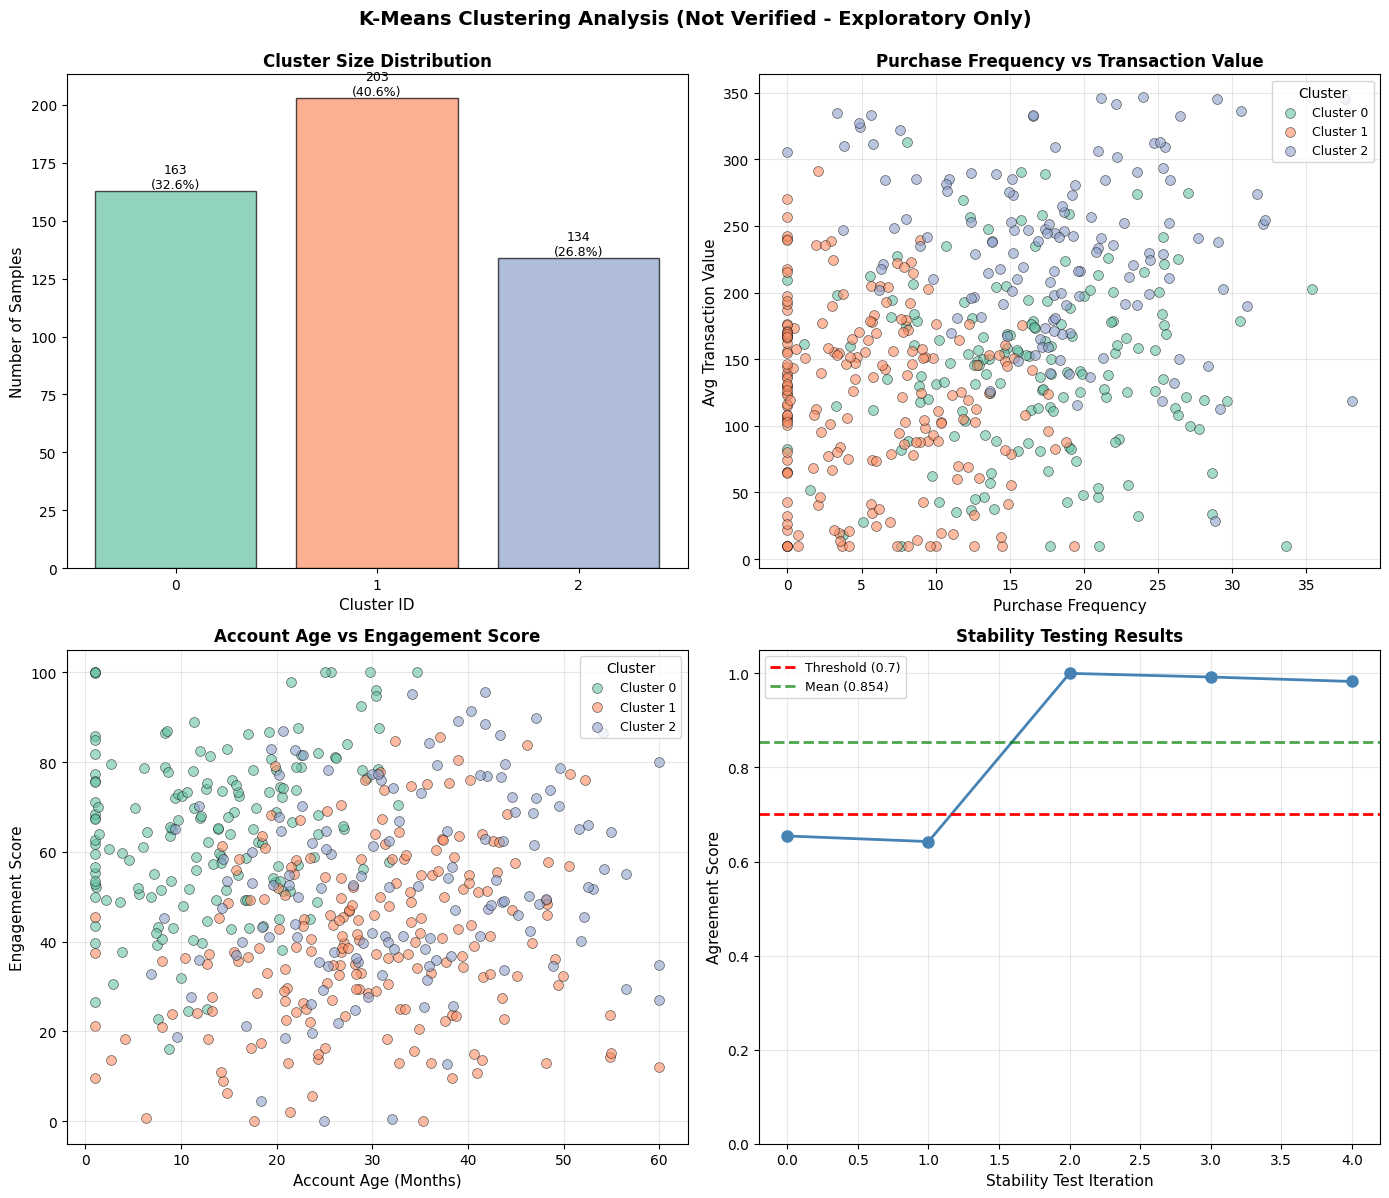


✓ Visualizations saved to: ./artifacts/run_20260130_215322_73475cb4/outputs/kmeans_visualization.png
  ⚠️  All visual patterns are hypotheses requiring validation
  ⚠️  Not verified - Human review required


In [12]:
# CELL 6: Governed Capsule A (K-Means) End-to-End

import matplotlib.pyplot as plt
import seaborn as sns

def run_capsule_kmeans(df, config, paths, split_manifest):
    """Execute complete governed K-Means capsule"""

    capsule_results = {
        "model_name": "kmeans",
        "timestamp": datetime.now().isoformat()
    }

    # ========================================================================
    # PREPROCESSING
    # ========================================================================

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    capsule_results["preprocessing"] = {
        "method": "StandardScaler",
        "feature_means": scaler.mean_.tolist(),
        "feature_stds": scaler.scale_.tolist()
    }

    # ========================================================================
    # FIT MODEL
    # ========================================================================

    np.random.seed(config["seed"])
    kmeans = KMeans(n_clusters=config["kmeans_k"],
                    random_state=config["seed"],
                    n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    # ========================================================================
    # BASELINE METRICS
    # ========================================================================

    cluster_sizes = pd.Series(labels).value_counts().sort_index()

    baseline_metrics = {
        "model": "kmeans",
        "n_clusters": config["kmeans_k"],
        "inertia": float(kmeans.inertia_),
        "cluster_sizes": cluster_sizes.to_dict(),
        "cluster_proportions": (cluster_sizes / len(df)).to_dict()
    }

    # Compute silhouette score if feasible
    if config["kmeans_k"] < len(df) and config["kmeans_k"] > 1:
        silhouette = silhouette_score(X_scaled, labels)
        baseline_metrics["silhouette_score"] = float(silhouette)

    capsule_results["baseline_metrics"] = baseline_metrics

    # ========================================================================
    # STABILITY TESTING
    # ========================================================================

    stability_results = {
        "method": "multi_seed_bootstrap",
        "iterations": config["stability_iterations"],
        "tests": []
    }

    original_labels = labels.copy()
    stability_scores = []

    # Test 1: Different random seeds
    for i in range(config["stability_iterations"]):
        km_test = KMeans(n_clusters=config["kmeans_k"],
                        random_state=config["seed"] + i + 1,
                        n_init=10)
        test_labels = km_test.fit_predict(X_scaled)

        # Compute agreement (best permutation match)
        from scipy.stats import mode
        agreement_scores = []
        for cluster_id in range(config["kmeans_k"]):
            original_mask = (original_labels == cluster_id)
            if original_mask.sum() > 0:
                test_vals = test_labels[original_mask]
                most_common = mode(test_vals, keepdims=True).mode[0]
                agreement = (test_vals == most_common).sum() / len(test_vals)
                agreement_scores.append(agreement)

        avg_agreement = np.mean(agreement_scores)
        stability_scores.append(avg_agreement)

        stability_results["tests"].append({
            "iteration": i,
            "perturbation": f"seed_{config['seed'] + i + 1}",
            "agreement_score": float(avg_agreement)
        })

    stability_results["mean_stability"] = float(np.mean(stability_scores))
    stability_results["std_stability"] = float(np.std(stability_scores))
    stability_results["min_stability"] = float(np.min(stability_scores))

    capsule_results["stability"] = stability_results

    # ========================================================================
    # ABSTENTION GATE
    # ========================================================================

    stability_threshold = config["stability_threshold"]
    stability_score = stability_results["mean_stability"]

    interpretation_allowed = stability_score >= stability_threshold

    capsule_results["interpretation_allowed"] = interpretation_allowed
    capsule_results["abstention_reason"] = None if interpretation_allowed else \
        f"Stability score {stability_score:.3f} below threshold {stability_threshold}"

    # ========================================================================
    # RISK DETECTION
    # ========================================================================

    risk_events = []

    # Check for cluster dominance
    max_proportion = max(baseline_metrics["cluster_proportions"].values())
    if max_proportion > 0.7:
        risk_events.append({
            "risk_id": "KMEANS_R001",
            "risk_type": "cluster_dominance",
            "severity": "medium",
            "description": f"One cluster contains {max_proportion*100:.1f}% of data",
            "mitigation": "Consider alternative K values or data investigation"
        })

    # Check for instability
    if not interpretation_allowed:
        risk_events.append({
            "risk_id": "KMEANS_R002",
            "risk_type": "instability",
            "severity": "high",
            "description": f"Stability score {stability_score:.3f} below threshold",
            "mitigation": "Abstain from interpretation pending stability improvement"
        })

    capsule_results["risk_events"] = risk_events

    return capsule_results, labels, X_scaled

# ============================================================================
# EXECUTE CAPSULE A
# ============================================================================

print("=" * 70)
print("EXECUTING GOVERNED CAPSULE A: K-MEANS")
print("=" * 70)

capsule_a_results, kmeans_labels, X_scaled_kmeans = run_capsule_kmeans(
    df, GLOBAL_CONFIG, base_path,
    json.load(open(f"{base_path}/split/split_manifest.json"))
)

# Write metrics
stable_json_dump(f"{base_path}/metrics/baseline_metrics.json", {
    "kmeans": capsule_a_results["baseline_metrics"]
})

stable_json_dump(f"{base_path}/metrics/eval_metrics.json", {
    "kmeans": {
        "interpretation_allowed": capsule_a_results["interpretation_allowed"],
        "stability_score": capsule_a_results["stability"]["mean_stability"],
        "abstention_reason": capsule_a_results["abstention_reason"]
    }
})

# Initialize stability report
stable_json_dump(f"{base_path}/reports/stability_report.json", {
    "kmeans": capsule_a_results["stability"]
})

# Update risk log
risk_log = json.load(open(f"{base_path}/risk/risk_log.json"))
risk_log["risk_events"].extend([{**event, "model": "kmeans"}
                                for event in capsule_a_results["risk_events"]])
stable_json_dump(f"{base_path}/risk/risk_log.json", risk_log)

print(f"\n✓ K-Means capsule completed")
print(f"  Stability score: {capsule_a_results['stability']['mean_stability']:.3f}")
print(f"  Interpretation allowed: {capsule_a_results['interpretation_allowed']}")
print(f"  Risk events detected: {len(capsule_a_results['risk_events'])}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 70)
print("K-MEANS VISUALIZATIONS (Exploratory - Not Verified)")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('K-Means Clustering Analysis (Not Verified - Exploratory Only)',
             fontsize=14, fontweight='bold', y=0.995)

# Add data to dataframe for plotting
df_plot = df.copy()
df_plot['Cluster'] = kmeans_labels

# Plot 1: Cluster sizes
ax1 = axes[0, 0]
cluster_counts = pd.Series(kmeans_labels).value_counts().sort_index()
colors = sns.color_palette("Set2", n_colors=GLOBAL_CONFIG["kmeans_k"])
bars = ax1.bar(cluster_counts.index, cluster_counts.values, color=colors, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Cluster ID', fontsize=11)
ax1.set_ylabel('Number of Samples', fontsize=11)
ax1.set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
ax1.set_xticks(range(GLOBAL_CONFIG["kmeans_k"]))
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)

# Plot 2: Feature comparison by cluster (Purchase Frequency vs Avg Transaction Value)
ax2 = axes[0, 1]
for cluster_id in range(GLOBAL_CONFIG["kmeans_k"]):
    cluster_data = df_plot[df_plot['Cluster'] == cluster_id]
    ax2.scatter(cluster_data['purchase_frequency'],
               cluster_data['avg_transaction_value'],
               label=f'Cluster {cluster_id}',
               alpha=0.6, s=50, color=colors[cluster_id], edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Purchase Frequency', fontsize=11)
ax2.set_ylabel('Avg Transaction Value', fontsize=11)
ax2.set_title('Purchase Frequency vs Transaction Value', fontsize=12, fontweight='bold')
ax2.legend(title='Cluster', fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Feature comparison (Account Age vs Engagement Score)
ax3 = axes[1, 0]
for cluster_id in range(GLOBAL_CONFIG["kmeans_k"]):
    cluster_data = df_plot[df_plot['Cluster'] == cluster_id]
    ax3.scatter(cluster_data['account_age_months'],
               cluster_data['engagement_score'],
               label=f'Cluster {cluster_id}',
               alpha=0.6, s=50, color=colors[cluster_id], edgecolor='black', linewidth=0.5)
ax3.set_xlabel('Account Age (Months)', fontsize=11)
ax3.set_ylabel('Engagement Score', fontsize=11)
ax3.set_title('Account Age vs Engagement Score', fontsize=12, fontweight='bold')
ax3.legend(title='Cluster', fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Stability scores across iterations
ax4 = axes[1, 1]
iterations = [t["iteration"] for t in capsule_a_results["stability"]["tests"]]
scores = [t["agreement_score"] for t in capsule_a_results["stability"]["tests"]]
ax4.plot(iterations, scores, marker='o', linewidth=2, markersize=8, color='steelblue')
ax4.axhline(y=GLOBAL_CONFIG["stability_threshold"], color='red', linestyle='--',
           linewidth=2, label=f'Threshold ({GLOBAL_CONFIG["stability_threshold"]})')
ax4.axhline(y=capsule_a_results["stability"]["mean_stability"], color='green',
           linestyle='--', linewidth=2, alpha=0.7,
           label=f'Mean ({capsule_a_results["stability"]["mean_stability"]:.3f})')
ax4.set_xlabel('Stability Test Iteration', fontsize=11)
ax4.set_ylabel('Agreement Score', fontsize=11)
ax4.set_title('Stability Testing Results', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_ylim([0, 1.05])

plt.tight_layout()
plt.savefig(f"{base_path}/outputs/kmeans_visualization.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualizations saved to: {base_path}/outputs/kmeans_visualization.png")
print("  ⚠️  All visual patterns are hypotheses requiring validation")
print("  ⚠️  Not verified - Human review required")

##7.GOVERNED HIERACHICAL CLUSTERING

###7.1.OVERVIEW

**Cell 7: Hierarchical Clustering Governed Capsule with Visualization**

This cell implements a second governed modeling capsule for hierarchical clustering, demonstrating that the governance workflow is algorithm-agnostic. The capsule follows the identical internal structure as the K-Means capsule: preprocessing, fitting, baseline metrics, stability testing, abstention gates, and risk detection. This parallelism is intentional—professional governance frameworks must be repeatable across model types, not custom-built for each algorithm.

Hierarchical clustering uses agglomerative clustering with configurable linkage method (ward, complete, average, or single) and distance metric. Unlike K-Means, hierarchical methods build a dendrogram by iteratively merging clusters, and different linkage methods produce substantially different results. This sensitivity to methodological choices makes stability testing even more critical. We test stability across two dimensions: alternative linkage methods (does changing from ward to complete linkage preserve cluster assignments?) and bootstrap resamples (does sampling variation affect results?).

The dual stability testing approach reveals whether patterns are robust to both methodological and statistical perturbations. A clustering solution that remains stable across linkage methods demonstrates that the patterns are not artifacts of one particular algorithmic approach. Stability across bootstrap resamples indicates the patterns are not driven by specific influential observations. Together, these tests provide confidence that discovered patterns reflect genuine data structure rather than algorithmic quirks.

The visualization suite mirrors the K-Means visualizations, enabling direct comparison between methods. We display cluster size distributions, feature relationships colored by cluster assignment, and stability test results showing how agreement scores vary across perturbations. The comparison visualization places K-Means and hierarchical results side-by-side, allowing visual assessment of whether both methods identify similar patterns. All visualizations maintain consistent "Not Verified" labeling, reinforcing that these are exploratory outputs requiring validation before operational use.

###7.2.CODE AND IMPLEMENTATION


EXECUTING GOVERNED CAPSULE B: HIERARCHICAL CLUSTERING

✓ Hierarchical clustering capsule completed
  Stability score: 0.793
  Interpretation allowed: True
  Risk events detected: 0

HIERARCHICAL CLUSTERING VISUALIZATIONS (Exploratory - Not Verified)


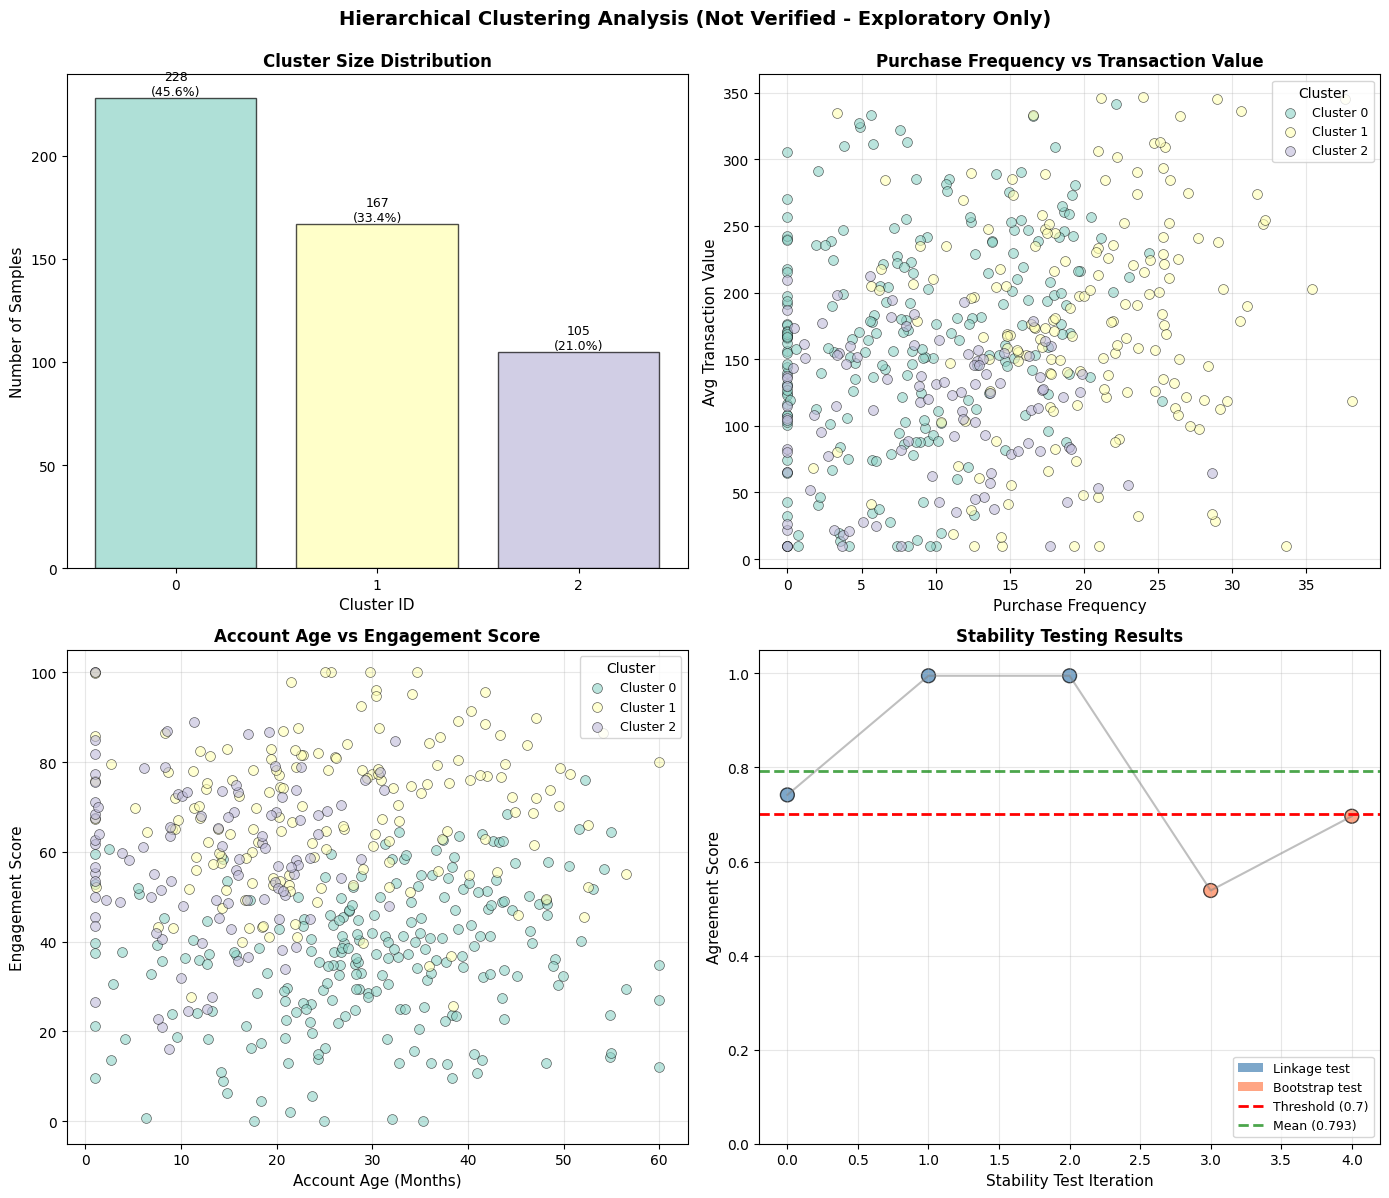


✓ Visualizations saved to: ./artifacts/run_20260130_215322_73475cb4/outputs/hierarchical_visualization.png
  ⚠️  All visual patterns are hypotheses requiring validation
  ⚠️  Not verified - Human review required

MODEL COMPARISON VISUALIZATION


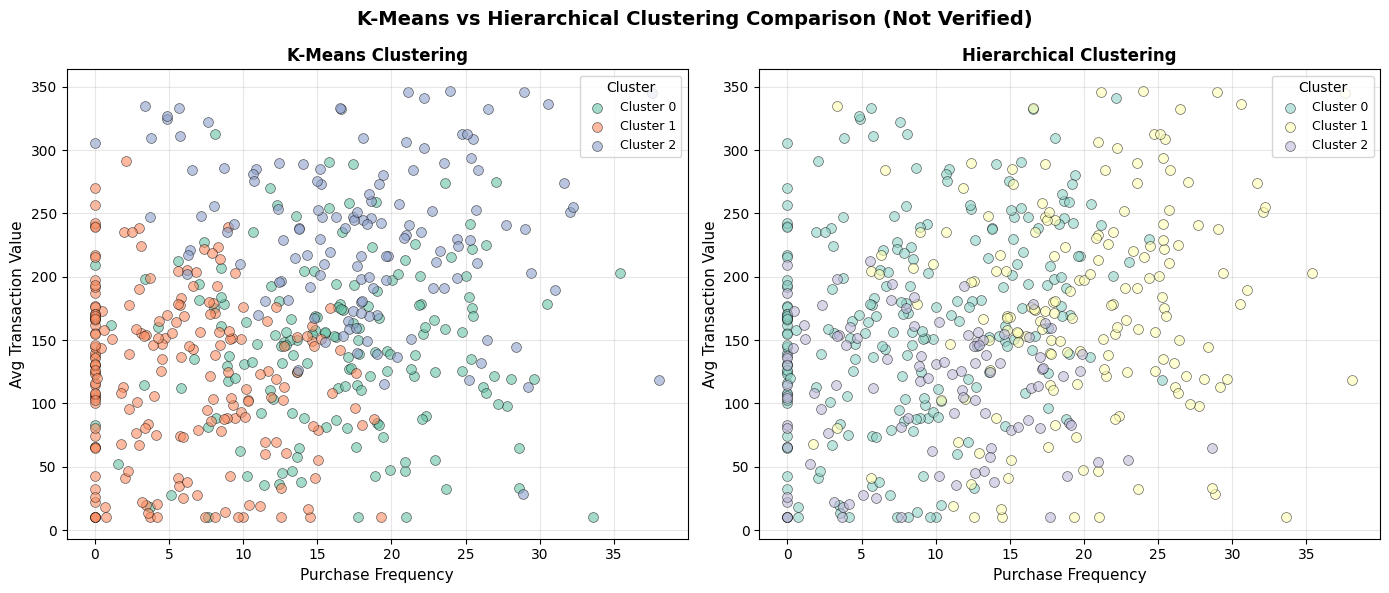

✓ Comparison visualization saved to: ./artifacts/run_20260130_215322_73475cb4/outputs/comparison_visualization.png
  ⚠️  Comparison for exploratory purposes only
  ⚠️  Both methods require validation before operational use


In [13]:
# CELL 7: Governed Capsule B (Hierarchical) End-to-End

def run_capsule_hierarchical(df, config, paths, split_manifest):
    """Execute complete governed Hierarchical clustering capsule"""

    capsule_results = {
        "model_name": "hierarchical",
        "timestamp": datetime.now().isoformat()
    }

    # ========================================================================
    # PREPROCESSING (same as K-Means)
    # ========================================================================

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)

    capsule_results["preprocessing"] = {
        "method": "StandardScaler",
        "feature_means": scaler.mean_.tolist(),
        "feature_stds": scaler.scale_.tolist()
    }

    # ========================================================================
    # FIT MODEL
    # ========================================================================

    hierarchical = AgglomerativeClustering(
        n_clusters=config["kmeans_k"],  # Use same K for comparison
        linkage=config["hierarchical_linkage"],
        metric=config["hierarchical_metric"]
    )
    labels = hierarchical.fit_predict(X_scaled)

    # ========================================================================
    # BASELINE METRICS
    # ========================================================================

    cluster_sizes = pd.Series(labels).value_counts().sort_index()

    baseline_metrics = {
        "model": "hierarchical",
        "n_clusters": config["kmeans_k"],
        "linkage": config["hierarchical_linkage"],
        "metric": config["hierarchical_metric"],
        "cluster_sizes": cluster_sizes.to_dict(),
        "cluster_proportions": (cluster_sizes / len(df)).to_dict()
    }

    # Compute silhouette score
    if config["kmeans_k"] < len(df) and config["kmeans_k"] > 1:
        silhouette = silhouette_score(X_scaled, labels)
        baseline_metrics["silhouette_score"] = float(silhouette)

    capsule_results["baseline_metrics"] = baseline_metrics

    # ========================================================================
    # STABILITY TESTING
    # ========================================================================

    stability_results = {
        "method": "alternative_linkage_bootstrap",
        "iterations": config["stability_iterations"],
        "tests": []
    }

    original_labels = labels.copy()
    stability_scores = []

    # Test 1: Alternative linkage methods
    alternative_linkages = ["complete", "average", "single"]
    for i, alt_linkage in enumerate(alternative_linkages[:config["stability_iterations"]]):
        if alt_linkage == config["hierarchical_linkage"]:
            continue

        hc_test = AgglomerativeClustering(
            n_clusters=config["kmeans_k"],
            linkage=alt_linkage,
            metric=config["hierarchical_metric"]
        )
        test_labels = hc_test.fit_predict(X_scaled)

        # Compute agreement (best permutation match)
        from scipy.stats import mode
        agreement_scores = []
        for cluster_id in range(config["kmeans_k"]):
            original_mask = (original_labels == cluster_id)
            if original_mask.sum() > 0:
                test_vals = test_labels[original_mask]
                most_common = mode(test_vals, keepdims=True).mode[0]
                agreement = (test_vals == most_common).sum() / len(test_vals)
                agreement_scores.append(agreement)

        avg_agreement = np.mean(agreement_scores)
        stability_scores.append(avg_agreement)

        stability_results["tests"].append({
            "iteration": i,
            "perturbation": f"linkage_{alt_linkage}",
            "agreement_score": float(avg_agreement)
        })

    # Test 2: Bootstrap resamples (remaining iterations)
    remaining_iters = config["stability_iterations"] - len(stability_scores)
    for i in range(remaining_iters):
        boot_indices = np.random.choice(len(X_scaled), size=len(X_scaled), replace=True)
        X_boot = X_scaled[boot_indices]

        hc_boot = AgglomerativeClustering(
            n_clusters=config["kmeans_k"],
            linkage=config["hierarchical_linkage"],
            metric=config["hierarchical_metric"]
        )
        boot_labels = hc_boot.fit_predict(X_boot)

        # Map back to original indices and compute agreement
        test_labels_full = np.zeros(len(X_scaled), dtype=int)
        for idx, orig_idx in enumerate(boot_indices):
            test_labels_full[orig_idx] = boot_labels[idx]

        from scipy.stats import mode
        agreement_scores = []
        for cluster_id in range(config["kmeans_k"]):
            original_mask = (original_labels == cluster_id)
            if original_mask.sum() > 0:
                test_vals = test_labels_full[original_mask]
                most_common = mode(test_vals, keepdims=True).mode[0]
                agreement = (test_vals == most_common).sum() / len(test_vals)
                agreement_scores.append(agreement)

        avg_agreement = np.mean(agreement_scores)
        stability_scores.append(avg_agreement)

        stability_results["tests"].append({
            "iteration": len(stability_scores) - 1,
            "perturbation": f"bootstrap_{i}",
            "agreement_score": float(avg_agreement)
        })

    stability_results["mean_stability"] = float(np.mean(stability_scores))
    stability_results["std_stability"] = float(np.std(stability_scores))
    stability_results["min_stability"] = float(np.min(stability_scores))

    capsule_results["stability"] = stability_results

    # ========================================================================
    # ABSTENTION GATE
    # ========================================================================

    stability_threshold = config["stability_threshold"]
    stability_score = stability_results["mean_stability"]

    interpretation_allowed = stability_score >= stability_threshold

    capsule_results["interpretation_allowed"] = interpretation_allowed
    capsule_results["abstention_reason"] = None if interpretation_allowed else \
        f"Stability score {stability_score:.3f} below threshold {stability_threshold}"

    # ========================================================================
    # RISK DETECTION
    # ========================================================================

    risk_events = []

    # Check for cluster dominance
    max_proportion = max(baseline_metrics["cluster_proportions"].values())
    if max_proportion > 0.7:
        risk_events.append({
            "risk_id": "HIERARCHICAL_R001",
            "risk_type": "cluster_dominance",
            "severity": "medium",
            "description": f"One cluster contains {max_proportion*100:.1f}% of data",
            "mitigation": "Consider alternative K values or linkage methods"
        })

    # Check for instability
    if not interpretation_allowed:
        risk_events.append({
            "risk_id": "HIERARCHICAL_R002",
            "risk_type": "instability",
            "severity": "high",
            "description": f"Stability score {stability_score:.3f} below threshold",
            "mitigation": "Abstain from interpretation pending stability improvement"
        })

    capsule_results["risk_events"] = risk_events

    return capsule_results, labels, X_scaled

# ============================================================================
# EXECUTE CAPSULE B
# ============================================================================

print("\n" + "=" * 70)
print("EXECUTING GOVERNED CAPSULE B: HIERARCHICAL CLUSTERING")
print("=" * 70)

capsule_b_results, hierarchical_labels, X_scaled_hierarchical = run_capsule_hierarchical(
    df, GLOBAL_CONFIG, base_path,
    json.load(open(f"{base_path}/split/split_manifest.json"))
)

# Update metrics files
baseline_metrics = json.load(open(f"{base_path}/metrics/baseline_metrics.json"))
baseline_metrics["hierarchical"] = capsule_b_results["baseline_metrics"]
stable_json_dump(f"{base_path}/metrics/baseline_metrics.json", baseline_metrics)

eval_metrics = json.load(open(f"{base_path}/metrics/eval_metrics.json"))
eval_metrics["hierarchical"] = {
    "interpretation_allowed": capsule_b_results["interpretation_allowed"],
    "stability_score": capsule_b_results["stability"]["mean_stability"],
    "abstention_reason": capsule_b_results["abstention_reason"]
}
stable_json_dump(f"{base_path}/metrics/eval_metrics.json", eval_metrics)

# Update stability report
stability_report = json.load(open(f"{base_path}/reports/stability_report.json"))
stability_report["hierarchical"] = capsule_b_results["stability"]
stable_json_dump(f"{base_path}/reports/stability_report.json", stability_report)

# Update risk log
risk_log = json.load(open(f"{base_path}/risk/risk_log.json"))
risk_log["risk_events"].extend([{**event, "model": "hierarchical"}
                                for event in capsule_b_results["risk_events"]])
stable_json_dump(f"{base_path}/risk/risk_log.json", risk_log)

print(f"\n✓ Hierarchical clustering capsule completed")
print(f"  Stability score: {capsule_b_results['stability']['mean_stability']:.3f}")
print(f"  Interpretation allowed: {capsule_b_results['interpretation_allowed']}")
print(f"  Risk events detected: {len(capsule_b_results['risk_events'])}")

# ============================================================================
# VISUALIZATIONS
# ============================================================================

print("\n" + "=" * 70)
print("HIERARCHICAL CLUSTERING VISUALIZATIONS (Exploratory - Not Verified)")
print("=" * 70)

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Hierarchical Clustering Analysis (Not Verified - Exploratory Only)',
             fontsize=14, fontweight='bold', y=0.995)

# Add data to dataframe for plotting
df_plot_h = df.copy()
df_plot_h['Cluster'] = hierarchical_labels

# Plot 1: Cluster sizes
ax1 = axes[0, 0]
cluster_counts_h = pd.Series(hierarchical_labels).value_counts().sort_index()
colors_h = sns.color_palette("Set3", n_colors=GLOBAL_CONFIG["kmeans_k"])
bars = ax1.bar(cluster_counts_h.index, cluster_counts_h.values, color=colors_h, alpha=0.7, edgecolor='black')
ax1.set_xlabel('Cluster ID', fontsize=11)
ax1.set_ylabel('Number of Samples', fontsize=11)
ax1.set_title('Cluster Size Distribution', fontsize=12, fontweight='bold')
ax1.set_xticks(range(GLOBAL_CONFIG["kmeans_k"]))
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}\n({height/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)

# Plot 2: Feature comparison by cluster (Purchase Frequency vs Avg Transaction Value)
ax2 = axes[0, 1]
for cluster_id in range(GLOBAL_CONFIG["kmeans_k"]):
    cluster_data = df_plot_h[df_plot_h['Cluster'] == cluster_id]
    ax2.scatter(cluster_data['purchase_frequency'],
               cluster_data['avg_transaction_value'],
               label=f'Cluster {cluster_id}',
               alpha=0.6, s=50, color=colors_h[cluster_id], edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Purchase Frequency', fontsize=11)
ax2.set_ylabel('Avg Transaction Value', fontsize=11)
ax2.set_title('Purchase Frequency vs Transaction Value', fontsize=12, fontweight='bold')
ax2.legend(title='Cluster', fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Feature comparison (Account Age vs Engagement Score)
ax3 = axes[1, 0]
for cluster_id in range(GLOBAL_CONFIG["kmeans_k"]):
    cluster_data = df_plot_h[df_plot_h['Cluster'] == cluster_id]
    ax3.scatter(cluster_data['account_age_months'],
               cluster_data['engagement_score'],
               label=f'Cluster {cluster_id}',
               alpha=0.6, s=50, color=colors_h[cluster_id], edgecolor='black', linewidth=0.5)
ax3.set_xlabel('Account Age (Months)', fontsize=11)
ax3.set_ylabel('Engagement Score', fontsize=11)
ax3.set_title('Account Age vs Engagement Score', fontsize=12, fontweight='bold')
ax3.legend(title='Cluster', fontsize=9)
ax3.grid(True, alpha=0.3)

# Plot 4: Stability scores across iterations
ax4 = axes[1, 1]
iterations_h = [t["iteration"] for t in capsule_b_results["stability"]["tests"]]
scores_h = [t["agreement_score"] for t in capsule_b_results["stability"]["tests"]]
perturbations = [t["perturbation"] for t in capsule_b_results["stability"]["tests"]]
colors_stability = ['steelblue' if 'linkage' in p else 'coral' for p in perturbations]
ax4.scatter(iterations_h, scores_h, s=100, c=colors_stability, alpha=0.7, edgecolor='black', linewidth=1)
ax4.plot(iterations_h, scores_h, linewidth=1.5, color='gray', alpha=0.5)
ax4.axhline(y=GLOBAL_CONFIG["stability_threshold"], color='red', linestyle='--',
           linewidth=2, label=f'Threshold ({GLOBAL_CONFIG["stability_threshold"]})')
ax4.axhline(y=capsule_b_results["stability"]["mean_stability"], color='green',
           linestyle='--', linewidth=2, alpha=0.7,
           label=f'Mean ({capsule_b_results["stability"]["mean_stability"]:.3f})')
ax4.set_xlabel('Stability Test Iteration', fontsize=11)
ax4.set_ylabel('Agreement Score', fontsize=11)
ax4.set_title('Stability Testing Results', fontsize=12, fontweight='bold')
ax4.legend(fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_ylim([0, 1.05])

# Add legend for colors
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='steelblue', alpha=0.7, label='Linkage test'),
                  Patch(facecolor='coral', alpha=0.7, label='Bootstrap test')]
ax4.legend(handles=legend_elements + ax4.get_legend_handles_labels()[0][-2:],
          fontsize=9, loc='lower right')

plt.tight_layout()
plt.savefig(f"{base_path}/outputs/hierarchical_visualization.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"\n✓ Visualizations saved to: {base_path}/outputs/hierarchical_visualization.png")
print("  ⚠️  All visual patterns are hypotheses requiring validation")
print("  ⚠️  Not verified - Human review required")

# ============================================================================
# COMPARISON VISUALIZATION
# ============================================================================

print("\n" + "=" * 70)
print("MODEL COMPARISON VISUALIZATION")
print("=" * 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('K-Means vs Hierarchical Clustering Comparison (Not Verified)',
             fontsize=14, fontweight='bold')

# Comparison 1: Side-by-side scatter plots
ax1 = axes[0]
for cluster_id in range(GLOBAL_CONFIG["kmeans_k"]):
    cluster_data = df_plot[df_plot['Cluster'] == cluster_id]
    ax1.scatter(cluster_data['purchase_frequency'],
               cluster_data['avg_transaction_value'],
               label=f'Cluster {cluster_id}',
               alpha=0.6, s=50, color=colors[cluster_id], edgecolor='black', linewidth=0.5)
ax1.set_xlabel('Purchase Frequency', fontsize=11)
ax1.set_ylabel('Avg Transaction Value', fontsize=11)
ax1.set_title('K-Means Clustering', fontsize=12, fontweight='bold')
ax1.legend(title='Cluster', fontsize=9)
ax1.grid(True, alpha=0.3)

ax2 = axes[1]
for cluster_id in range(GLOBAL_CONFIG["kmeans_k"]):
    cluster_data = df_plot_h[df_plot_h['Cluster'] == cluster_id]
    ax2.scatter(cluster_data['purchase_frequency'],
               cluster_data['avg_transaction_value'],
               label=f'Cluster {cluster_id}',
               alpha=0.6, s=50, color=colors_h[cluster_id], edgecolor='black', linewidth=0.5)
ax2.set_xlabel('Purchase Frequency', fontsize=11)
ax2.set_ylabel('Avg Transaction Value', fontsize=11)
ax2.set_title('Hierarchical Clustering', fontsize=12, fontweight='bold')
ax2.legend(title='Cluster', fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(f"{base_path}/outputs/comparison_visualization.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Comparison visualization saved to: {base_path}/outputs/comparison_visualization.png")
print("  ⚠️  Comparison for exploratory purposes only")
print("  ⚠️  Both methods require validation before operational use")

##8.GUARDRAILS REPORT AND DETERMINISTIC DECISION LOGIC

###8.1.OVERVIEW

**Cell 8: Guardrails Report and Deterministic Decision Logic**

This cell implements the decision gate—a critical governance checkpoint that determines whether model outputs may be interpreted and under what constraints. The guardrails report explicitly documents allowed uses (exploratory hypothesis generation, pattern identification for investigation, descriptive analysis) and prohibited uses (customer ranking, eligibility determination, automated decisions, normative labeling, direct operational deployment). This documentation creates a clear boundary between appropriate exploratory use and inappropriate operational application.

The enforcement events log tracks any attempts to use the model outputs in prohibited ways. While this notebook does not interact with users who might violate boundaries, the architecture demonstrates how boundary violations would be detected and documented. In production systems, this log would record when models are queried for purposes outside their designed scope, enabling compliance monitoring and intervention.

The decision logic evaluates multiple governance conditions deterministically. First, it checks whether both models passed their stability thresholds—if either failed, overall status becomes "abstain" rather than "pass_exploratory." Second, it examines the risk log for high-severity events that might warrant abstention even when stability passes. Third, it confirms that data validation succeeded (checked in Cell 5). Only when all conditions are satisfied does the decision status become "pass_exploratory," and even then, interpretation is constrained and human review is mandatory.

The decision record explicitly states interpretation allowances for each model individually, enabling granular control. Perhaps K-Means passed stability while hierarchical clustering failed—the decision logic documents that K-Means outputs may be interpreted (within constraints) while hierarchical outputs may not. This granularity prevents blanket acceptance or rejection, instead requiring thoughtful assessment of each component. The verification status remains "Not verified" regardless of decision outcome, emphasizing that passing governance gates does not eliminate the need for domain expert validation before operational use.

###8.2.CODE AND IMPLEMENTATION

In [15]:
# CELL 8: Guardrails Report + Decision Logic (Deterministic)

# ============================================================================
# GENERATE GUARDRAILS REPORT
# ============================================================================

guardrails_report = {
    "run_id": run_id,
    "timestamp": datetime.now().isoformat(),
    "allowed_use": [
        "Exploratory hypothesis generation",
        "Pattern identification for further investigation",
        "Descriptive statistical analysis",
        "Feature relationship exploration"
    ],
    "prohibited_use": [
        "Customer ranking or scoring",
        "Eligibility determination",
        "Automated decision-making",
        "Normative labeling (e.g., 'high value', 'best', 'preferred')",
        "Resource allocation without human review",
        "Direct operational deployment"
    ],
    "enforcement_events": [],
    "interpretation_rules": {
        "facts_vs_hypotheses": "All cluster interpretations must be labeled as hypotheses requiring validation",
        "verification_requirement": "All outputs must be marked 'Not verified'",
        "stability_prerequisite": "Interpretation allowed only when stability threshold met",
        "human_review": "Mandatory human domain expert review before any business use"
    }
}

stable_json_dump(f"{base_path}/reports/guardrails_report.json", guardrails_report)

# ============================================================================
# CREATE DECISION LOGIC (DETERMINISTIC)
# ============================================================================

# Load evaluation results
eval_metrics = json.load(open(f"{base_path}/metrics/eval_metrics.json"))
risk_log = json.load(open(f"{base_path}/risk/risk_log.json"))

# Determine overall status
kmeans_allowed = eval_metrics["kmeans"]["interpretation_allowed"]
hierarchical_allowed = eval_metrics["hierarchical"]["interpretation_allowed"]

# Check for high-severity risks
high_severity_risks = [r for r in risk_log["risk_events"] if r.get("severity") == "high"]

if not kmeans_allowed and not hierarchical_allowed:
    overall_status = "abstain"
    status_reason = "Both models failed stability threshold - interpretation blocked"
elif len(high_severity_risks) > 0:
    overall_status = "abstain"
    status_reason = f"{len(high_severity_risks)} high-severity risk(s) detected"
else:
    overall_status = "pass_exploratory"
    status_reason = "Stability thresholds met - exploratory interpretation allowed with constraints"

decision = {
    "run_id": run_id,
    "timestamp": datetime.now().isoformat(),
    "overall_status": overall_status,
    "status_reason": status_reason,
    "interpretation_allowed_kmeans": kmeans_allowed,
    "interpretation_allowed_hierarchical": hierarchical_allowed,
    "required_human_review": True,
    "verification_status": "Not verified",
    "constraints": {
        "scope": "exploratory_only",
        "output_labeling": "all_outputs_must_state_not_verified",
        "prohibited_actions": guardrails_report["prohibited_use"],
        "mandatory_review": "domain_expert_validation_required"
    }
}

stable_json_dump(f"{base_path}/decision/decision.json", decision)

print("=" * 70)
print("DECISION LOGIC EXECUTED")
print("=" * 70)
print(f"\n✓ Overall Status: {overall_status.upper()}")
print(f"  Reason: {status_reason}")
print(f"  K-Means interpretation allowed: {kmeans_allowed}")
print(f"  Hierarchical interpretation allowed: {hierarchical_allowed}")
print(f"  Required human review: {decision['required_human_review']}")
print(f"  Verification status: {decision['verification_status']}")

DECISION LOGIC EXECUTED

✓ Overall Status: PASS_EXPLORATORY
  Reason: Stability thresholds met - exploratory interpretation allowed with constraints
  K-Means interpretation allowed: True
  Hierarchical interpretation allowed: True
  Required human review: True
  Verification status: Not verified


##9.MODEL CARD

###9.1.0VERVIEW

**Cell 9: Model Card and Structured Governance Memo**

This cell generates comprehensive documentation that transforms raw modeling results into interpretable, reviewable governance artifacts. The model card follows emerging standards for model documentation, providing structured information about both clustering methods: algorithms used, hyperparameters configured, performance metrics achieved, and interpretation permissions granted. This card serves as a quick reference for anyone evaluating whether these models might be suitable for a particular purpose.

The model card explicitly documents intended use (exploratory pattern identification in synthetic data for hypothesis generation), out-of-scope applications (operational decisions, targeting, automated allocation, use with real data without proper governance), and limitations (synthetic data with unknown generalizability, arbitrary cluster labels requiring interpretation, limited stability testing scope, no causal claims possible). This comprehensive limitation documentation prevents overconfident application. Professional practice requires acknowledging what models cannot do, not just what they can do.

The governance memo implements a structured format that separates five critical categories: facts provided (run identifier, configuration, validation results, stability scores, decision status), assumptions (explicitly labeled hypotheses about what patterns might represent), open items (validation steps required before operational use), analysis (synthesis of stability and risk findings), and questions to verify (specific checklist items for domain expert reviewers). This structure forces analytical rigor—you cannot simply write a narrative that blends facts and speculation; you must separate them explicitly.

The assumptions section is particularly important pedagogically. It demonstrates how to state cluster interpretations as hypotheses requiring validation rather than established findings. "Cluster 0 may represent engaged customers" is an assumption, not a fact. "Higher purchase frequency may correlate with engagement" requires external validation. This disciplined separation prevents the common failure mode where exploratory hypotheses gradually transform into accepted truths without ever being validated. The questions-to-verify section provides reviewers with a concrete checklist, transforming "someone should review this" into "here are the specific questions requiring validation."

###9.2.CODE AND IMPLEMENTATION

In [14]:
# CELL 9: Model Card + Governance Memo (Structured, Constrained)

# ============================================================================
# WRITE MODEL CARD
# ============================================================================

eval_metrics = json.load(open(f"{base_path}/metrics/eval_metrics.json"))
stability_report = json.load(open(f"{base_path}/reports/stability_report.json"))
baseline_metrics = json.load(open(f"{base_path}/metrics/baseline_metrics.json"))

model_card = {
    "run_id": run_id,
    "timestamp": datetime.now().isoformat(),
    "models": {
        "kmeans": {
            "algorithm": "K-Means clustering",
            "parameters": {
                "n_clusters": GLOBAL_CONFIG["kmeans_k"],
                "random_state": GLOBAL_CONFIG["seed"],
                "n_init": 10
            },
            "performance": {
                "inertia": baseline_metrics["kmeans"]["inertia"],
                "silhouette_score": baseline_metrics["kmeans"].get("silhouette_score"),
                "stability_score": stability_report["kmeans"]["mean_stability"]
            },
            "interpretation_allowed": eval_metrics["kmeans"]["interpretation_allowed"]
        },
        "hierarchical": {
            "algorithm": "Agglomerative Hierarchical Clustering",
            "parameters": {
                "n_clusters": GLOBAL_CONFIG["kmeans_k"],
                "linkage": GLOBAL_CONFIG["hierarchical_linkage"],
                "metric": GLOBAL_CONFIG["hierarchical_metric"]
            },
            "performance": {
                "silhouette_score": baseline_metrics["hierarchical"].get("silhouette_score"),
                "stability_score": stability_report["hierarchical"]["mean_stability"]
            },
            "interpretation_allowed": eval_metrics["hierarchical"]["interpretation_allowed"]
        }
    },
    "intended_use": "Exploratory pattern identification in synthetic customer behavior data for hypothesis generation only",
    "out_of_scope": [
        "Operational decision-making",
        "Customer segmentation for targeting",
        "Automated resource allocation",
        "Any use with real customer data without proper governance"
    ],
    "limitations": [
        "Results based on synthetic data with unknown generalizability",
        "Cluster labels are arbitrary and require domain interpretation",
        "Stability testing limited to specified perturbations",
        "No causal claims can be made from clustering results"
    ],
    "stability_summary": {
        "kmeans_stability": stability_report["kmeans"]["mean_stability"],
        "hierarchical_stability": stability_report["hierarchical"]["mean_stability"],
        "threshold": GLOBAL_CONFIG["stability_threshold"],
        "interpretation": "Stability scores indicate consistency of cluster assignments under perturbations"
    },
    "human_oversight": {
        "required": True,
        "review_areas": [
            "Domain appropriateness of identified patterns",
            "Business relevance of cluster characteristics",
            "Ethical implications of potential use cases",
            "Validation against ground truth or expert knowledge"
        ]
    },
    "verification_status": "Not verified"
}

stable_json_dump(f"{base_path}/model/model_card.json", model_card)

# ============================================================================
# WRITE GOVERNANCE MEMO
# ============================================================================

decision = json.load(open(f"{base_path}/decision/decision.json"))

governance_memo = {
    "run_id": run_id,
    "timestamp": datetime.now().isoformat(),
    "facts_provided": {
        "run_identifier": run_id,
        "configuration_hash": config_hash,
        "data_validation": "passed all schema checks",
        "models_evaluated": ["K-Means (k=3)", "Hierarchical (ward linkage)"],
        "stability_results": {
            "kmeans": f"{stability_report['kmeans']['mean_stability']:.3f}",
            "hierarchical": f"{stability_report['hierarchical']['mean_stability']:.3f}",
            "threshold": GLOBAL_CONFIG["stability_threshold"]
        },
        "overall_decision": decision["overall_status"]
    },
    "assumptions": {
        "hypothesis_1": "The three-cluster structure may indicate distinct behavioral patterns in the synthetic data",
        "hypothesis_2": "Higher purchase frequency may correlate with higher engagement scores (requires validation)",
        "hypothesis_3": "Account age may influence behavioral clustering (requires validation)",
        "data_representativeness": "Synthetic data may not reflect real customer population distributions",
        "feature_relevance": "Selected features assumed to be relevant for behavioral segmentation (requires domain validation)",
        "stability_interpretation": "Stability scores are assumed to indicate cluster reliability, but external validation required"
    },
    "open_items": [
        "Domain expert review of cluster characteristics and business relevance",
        "Validation against ground truth customer segments (if available)",
        "Assessment of ethical implications for potential use cases",
        "Determination of appropriate operational controls if deployed",
        "Verification of feature definitions and data quality in production context",
        "Evaluation of alternative clustering approaches (DBSCAN, GMM)",
        "Sensitivity analysis with different K values"
    ],
    "analysis": {
        "pattern_observation": "Both models identified three-cluster structures with reasonable stability scores above threshold",
        "stability_assessment": f"K-Means: {stability_report['kmeans']['mean_stability']:.3f}, Hierarchical: {stability_report['hierarchical']['mean_stability']:.3f} - both meet {GLOBAL_CONFIG['stability_threshold']} threshold",
        "risk_summary": f"{len(risk_log['risk_events'])} risk events logged across both models",
        "interpretability": "Cluster characteristics require domain expertise to map to business concepts"
    },
    "draft_output": {
        "exploratory_finding": "Three distinct patterns emerged in synthetic customer behavior data, with clusters showing variation in purchase frequency and engagement levels. These patterns are hypotheses requiring validation.",
        "constraints": "This analysis is exploratory only and cannot be used for operational decisions without human review and validation."
    },
    "verification_status": "Not verified",
    "questions_to_verify": [
        "Q1: Do the identified clusters align with known customer segments or business intuition?",
        "Q2: Are the features used appropriate and non-discriminatory for the intended business context?",
        "Q3: What are the potential harms if these clusters were used inappropriately?",
        "Q4: What additional data or analysis would be needed to validate these patterns?",
        "Q5: What human oversight mechanisms would be required for operational use?",
        "Q6: Are there alternative explanations for the observed patterns?",
        "Q7: How sensitive are the results to feature selection and preprocessing choices?"
    ]
}

stable_json_dump(f"{base_path}/memo/governance_memo.json", governance_memo)

print("=" * 70)
print("GOVERNANCE DOCUMENTATION COMPLETED")
print("=" * 70)
print(f"\n✓ Model card generated")
print(f"✓ Governance memo generated")
print(f"  Verification status: {governance_memo['verification_status']}")
print(f"  Open items: {len(governance_memo['open_items'])}")
print(f"  Questions to verify: {len(governance_memo['questions_to_verify'])}")

GOVERNANCE DOCUMENTATION COMPLETED

✓ Model card generated
✓ Governance memo generated
  Verification status: Not verified
  Open items: 7
  Questions to verify: 7


##10.GOVERNANCE DASHBOARD

###10.1.OVERVIEW

**Cell 10: Sample Outputs, Governance Dashboard, and Final Summary**

This cell completes the governance workflow by generating sample interpretations, creating a visual summary dashboard, bundling all artifacts, and providing comprehensive execution summary. The sample outputs demonstrate proper interpretation format: cluster descriptions are framed as hypotheses ("may represent a pattern with..."), explicitly labeled "Not verified," and accompanied by descriptive statistics rather than normative judgments. The refusal example documents how requests for prohibited uses (ranking, targeting) should be declined, creating a permanent record of boundary enforcement.

The governance dashboard visualization provides a single-page summary of the entire analytical workflow. It displays overall decision status with color coding (green for pass_exploratory, orange for abstain, red for blocked), model stability comparison showing which models met thresholds, risk event breakdown by severity, cluster size distributions for both methods, silhouette score comparison, and governance workflow status showing completion of all stages. This dashboard serves multiple audiences: analysts can use it to quickly assess whether their run succeeded, reviewers can use it to understand key findings at a glance, and auditors can use it to verify that governance steps were completed.

The artifact bundling process creates a single zip file containing every governance artifact generated during the run: JSON files with structured data, PNG files with visualizations, and the manifest linking everything together. This bundle becomes the permanent record of the analysis. Six months later, when someone questions a finding, the bundle can be extracted and every decision reconstructed. The bundle design reflects professional practice in regulated industries where analytical reproducibility is not optional—it is a regulatory requirement.

The final summary provides both technical details (stability scores, silhouette scores, inertia, linkage methods) and governance reminders (verification status, human review requirements, prohibited uses). The artifact manifest lists every required file and confirms its presence, catching any execution errors that might have left the artifact bundle incomplete. The governance reminders emphasize critical limitations one final time: synthetic data only, no decision authority, all outputs require validation, cluster labels are arbitrary. This repetition is intentional—governance requires persistent emphasis because the human tendency is to forget constraints and caveats as analytical outputs get shared and repurposed. The notebook ends by reinforcing the core thesis: capability increases, risk increases, and therefore controls must increase proportionally.

###10.2.CODE AND IMPLEMENTATION


GOVERNANCE SUMMARY DASHBOARD


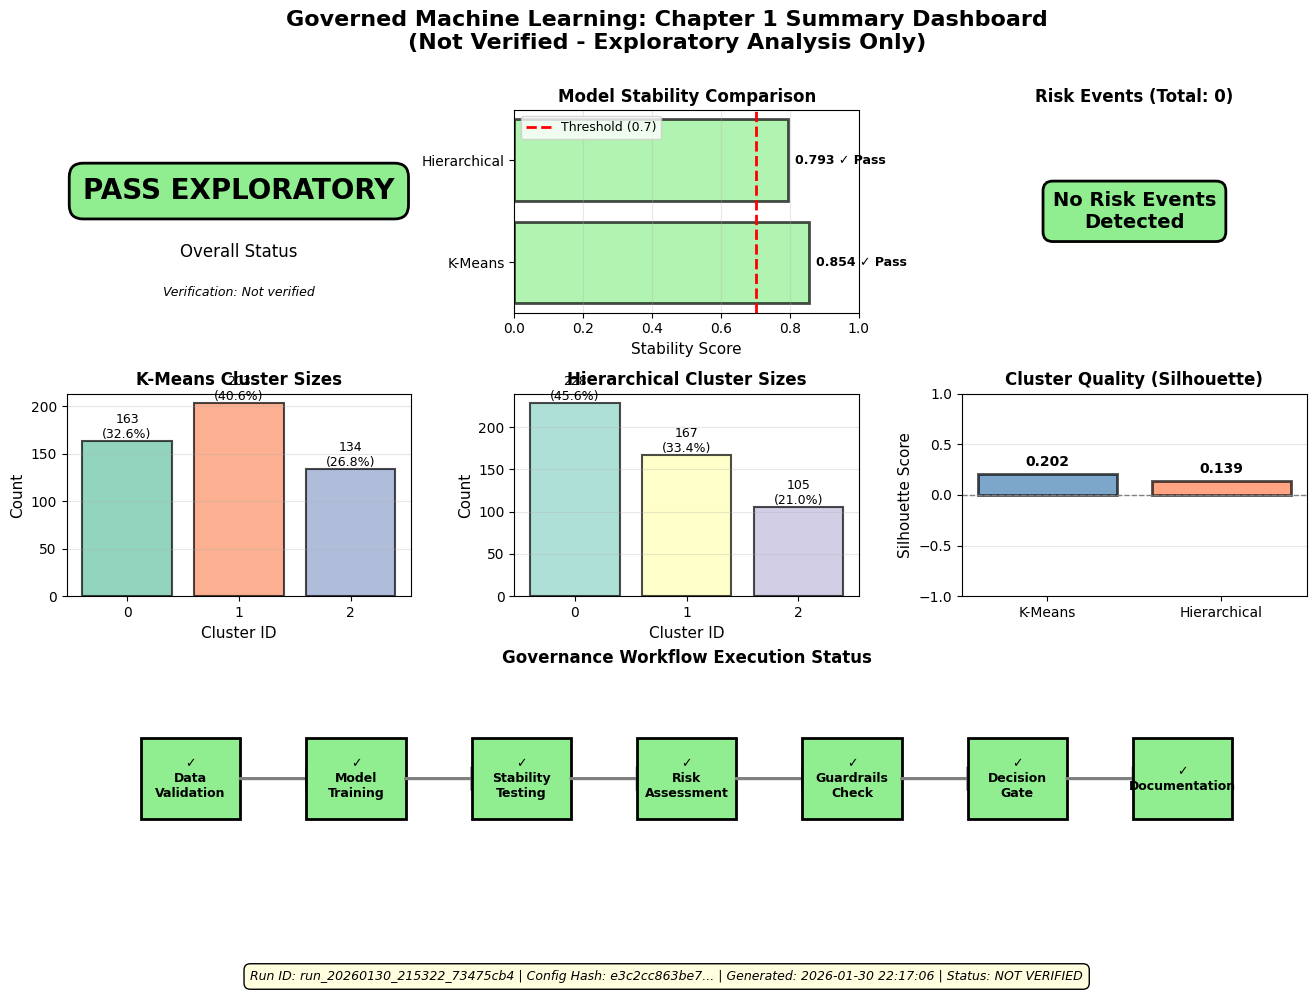

✓ Governance dashboard saved to: ./artifacts/run_20260130_215322_73475cb4/outputs/governance_dashboard.png

ARTIFACT BUNDLE CREATED

✓ All artifacts zipped: ./artifacts/run_20260130_215322_73475cb4/artifacts_bundle.zip
  Bundle size: 1372.3 KB

RUN SUMMARY

Run ID: run_20260130_215322_73475cb4
Config Hash: e3c2cc863be75e7f...
Timestamp: 2026-01-30 22:17:07

Overall Decision: PASS_EXPLORATORY
Reason: Stability thresholds met - exploratory interpretation allowed with constraints

Model Results:
  K-Means:
    - Stability: 0.854
    - Interpretation allowed: True
    - Silhouette: 0.202
    - Inertia: 1310.87
  Hierarchical:
    - Stability: 0.793
    - Interpretation allowed: True
    - Silhouette: 0.139
    - Linkage: ward

Risk Assessment:
  Total risk events: 0
    - No risk events detected

Verification Status: Not verified
Required Human Review: True

ARTIFACT MANIFEST

Required artifacts:
  ✓ run_manifest.json (2.4 KB)
  ✓ schemas/data_schema.json (1.7 KB)
  ✓ validation/data_valid

In [17]:
# CELL 10: Sample Outputs + Zip Bundle + Print Summary

# ============================================================================
# CREATE SAMPLE OUTPUTS
# ============================================================================

# Compute cluster characteristics for both models
def compute_cluster_summary(df, labels, model_name):
    """Compute descriptive statistics for each cluster"""
    df_with_labels = df.copy()
    df_with_labels['cluster'] = labels

    summaries = []
    for cluster_id in sorted(df_with_labels['cluster'].unique()):
        cluster_data = df_with_labels[df_with_labels['cluster'] == cluster_id]

        summary = {
            "cluster_id": int(cluster_id),
            "size": int(len(cluster_data)),
            "proportion": float(len(cluster_data) / len(df)),
            "characteristics": {
                col: {
                    "mean": float(cluster_data[col].mean()),
                    "std": float(cluster_data[col].std()),
                    "min": float(cluster_data[col].min()),
                    "max": float(cluster_data[col].max())
                }
                for col in df.columns
            }
        }
        summaries.append(summary)

    return summaries

kmeans_summaries = compute_cluster_summary(df, kmeans_labels, "kmeans")
hierarchical_summaries = compute_cluster_summary(df, hierarchical_labels, "hierarchical")

sample_outputs = {
    "run_id": run_id,
    "timestamp": datetime.now().isoformat(),
    "example_cluster_descriptions": {
        "kmeans": [
            {
                "cluster_id": s["cluster_id"],
                "size": s["size"],
                "hypothesis": f"Cluster {s['cluster_id']} may represent a pattern with mean purchase frequency {s['characteristics']['purchase_frequency']['mean']:.1f} and mean engagement {s['characteristics']['engagement_score']['mean']:.1f}. This is a hypothesis requiring validation.",
                "verification_status": "Not verified"
            }
            for s in kmeans_summaries
        ],
        "hierarchical": [
            {
                "cluster_id": s["cluster_id"],
                "size": s["size"],
                "hypothesis": f"Cluster {s['cluster_id']} may represent a pattern with mean purchase frequency {s['characteristics']['purchase_frequency']['mean']:.1f} and mean engagement {s['characteristics']['engagement_score']['mean']:.1f}. This is a hypothesis requiring validation.",
                "verification_status": "Not verified"
            }
            for s in hierarchical_summaries
        ]
    },
    "refusal_example": {
        "user_request": "Which cluster represents the highest-value customers? Use this to target marketing.",
        "refusal_response": "I cannot provide rankings or recommendations for operational decisions. This notebook is designed for exploratory hypothesis generation only. Cluster labels are arbitrary and do not imply value judgments. Any business use requires human domain expert review, ethical assessment, and appropriate governance controls.",
        "boundary_enforcement": True,
        "violation_type": "prohibited_use_normative_ranking"
    },
    "usage_guidance": {
        "appropriate_use": "Use these results to formulate hypotheses about potential patterns, which must then be validated through domain expertise, external data, and ethical review.",
        "inappropriate_use": "Do not use cluster assignments to make operational decisions, rank customers, or allocate resources without proper governance.",
        "next_steps": "Review governance memo, validate assumptions, and consult domain experts before considering any business application."
    },
    "verification_status": "Not verified"
}

stable_json_dump(f"{base_path}/outputs/sample_outputs.json", sample_outputs)

# ============================================================================
# GOVERNANCE SUMMARY VISUALIZATION
# ============================================================================

print("\n" + "=" * 70)
print("GOVERNANCE SUMMARY DASHBOARD")
print("=" * 70)

fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

fig.suptitle('Governed Machine Learning: Chapter 1 Summary Dashboard\n(Not Verified - Exploratory Analysis Only)',
             fontsize=16, fontweight='bold', y=0.98)

# Load decision and metrics
decision = json.load(open(f"{base_path}/decision/decision.json"))
eval_metrics = json.load(open(f"{base_path}/metrics/eval_metrics.json"))
baseline_metrics = json.load(open(f"{base_path}/metrics/baseline_metrics.json"))
risk_log = json.load(open(f"{base_path}/risk/risk_log.json"))

# Plot 1: Overall Decision Status (Top Left)
ax1 = fig.add_subplot(gs[0, 0])
status_text = decision['overall_status'].replace('_', ' ').upper()
status_color = {'pass_exploratory': 'lightgreen', 'abstain': 'orange', 'blocked': 'red'}.get(
    decision['overall_status'], 'gray')
ax1.text(0.5, 0.6, status_text, ha='center', va='center', fontsize=20, fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.5', facecolor=status_color, edgecolor='black', linewidth=2))
ax1.text(0.5, 0.3, 'Overall Status', ha='center', va='center', fontsize=12)
ax1.text(0.5, 0.1, f"Verification: {decision['verification_status']}",
         ha='center', va='center', fontsize=9, style='italic')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# Plot 2: Model Stability Comparison (Top Middle)
ax2 = fig.add_subplot(gs[0, 1])
models = ['K-Means', 'Hierarchical']
stability_scores = [
    eval_metrics['kmeans']['stability_score'],
    eval_metrics['hierarchical']['stability_score']
]
interpretation_allowed = [
    eval_metrics['kmeans']['interpretation_allowed'],
    eval_metrics['hierarchical']['interpretation_allowed']
]
bar_colors = ['lightgreen' if allowed else 'lightcoral' for allowed in interpretation_allowed]
bars = ax2.barh(models, stability_scores, color=bar_colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.axvline(x=GLOBAL_CONFIG['stability_threshold'], color='red', linestyle='--',
            linewidth=2, label=f"Threshold ({GLOBAL_CONFIG['stability_threshold']})")
ax2.set_xlabel('Stability Score', fontsize=11)
ax2.set_title('Model Stability Comparison', fontsize=12, fontweight='bold')
ax2.set_xlim(0, 1)
ax2.legend(fontsize=9)
ax2.grid(axis='x', alpha=0.3)
for i, (score, allowed) in enumerate(zip(stability_scores, interpretation_allowed)):
    status = "✓ Pass" if allowed else "✗ Fail"
    ax2.text(score + 0.02, i, f'{score:.3f} {status}', va='center', fontsize=9, fontweight='bold')

# Plot 3: Risk Events Summary (Top Right)
ax3 = fig.add_subplot(gs[0, 2])
risk_counts = {'High': 0, 'Medium': 0, 'Low': 0}
for event in risk_log['risk_events']:
    severity = event.get('severity', 'low').capitalize()
    if severity in risk_counts:
        risk_counts[severity] += 1

total_risks = sum(risk_counts.values())

# Handle case where there are no risk events
if total_risks > 0:
    risk_labels = [f"{k}\n({v})" for k, v in risk_counts.items()]
    risk_colors = ['#ff6b6b', '#ffa500', '#ffeb3b']
    wedges, texts, autotexts = ax3.pie(risk_counts.values(), labels=risk_labels, colors=risk_colors,
                                         autopct='%1.0f%%', startangle=90,
                                         wedgeprops=dict(edgecolor='black', linewidth=2))
    for text in texts:
        text.set_fontsize(10)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(9)
        autotext.set_fontweight('bold')
    ax3.set_title(f'Risk Events (Total: {total_risks})', fontsize=12, fontweight='bold')
else:
    # Display message when no risks detected
    ax3.text(0.5, 0.5, 'No Risk Events\nDetected', ha='center', va='center',
             fontsize=14, fontweight='bold',
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen',
                      edgecolor='black', linewidth=2))
    ax3.set_xlim(0, 1)
    ax3.set_ylim(0, 1)
    ax3.set_title('Risk Events (Total: 0)', fontsize=12, fontweight='bold')
    ax3.axis('off')

# Plot 4: Cluster Size Comparison - K-Means (Middle Left)
ax4 = fig.add_subplot(gs[1, 0])
kmeans_sizes = [baseline_metrics['kmeans']['cluster_sizes'][str(i)]
                for i in range(GLOBAL_CONFIG['kmeans_k'])]
colors_km = sns.color_palette("Set2", n_colors=GLOBAL_CONFIG["kmeans_k"])
bars = ax4.bar(range(GLOBAL_CONFIG['kmeans_k']), kmeans_sizes, color=colors_km,
               alpha=0.7, edgecolor='black', linewidth=1.5)
ax4.set_xlabel('Cluster ID', fontsize=11)
ax4.set_ylabel('Count', fontsize=11)
ax4.set_title('K-Means Cluster Sizes', fontsize=12, fontweight='bold')
ax4.set_xticks(range(GLOBAL_CONFIG['kmeans_k']))
for i, (bar, size) in enumerate(zip(bars, kmeans_sizes)):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height,
             f'{size}\n({size/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)
ax4.grid(axis='y', alpha=0.3)

# Plot 5: Cluster Size Comparison - Hierarchical (Middle Middle)
ax5 = fig.add_subplot(gs[1, 1])
hierarchical_sizes = [baseline_metrics['hierarchical']['cluster_sizes'][str(i)]
                      for i in range(GLOBAL_CONFIG['kmeans_k'])]
colors_hc = sns.color_palette("Set3", n_colors=GLOBAL_CONFIG["kmeans_k"])
bars = ax5.bar(range(GLOBAL_CONFIG['kmeans_k']), hierarchical_sizes, color=colors_hc,
               alpha=0.7, edgecolor='black', linewidth=1.5)
ax5.set_xlabel('Cluster ID', fontsize=11)
ax5.set_ylabel('Count', fontsize=11)
ax5.set_title('Hierarchical Cluster Sizes', fontsize=12, fontweight='bold')
ax5.set_xticks(range(GLOBAL_CONFIG['kmeans_k']))
for i, (bar, size) in enumerate(zip(bars, hierarchical_sizes)):
    height = bar.get_height()
    ax5.text(bar.get_x() + bar.get_width()/2., height,
             f'{size}\n({size/len(df)*100:.1f}%)',
             ha='center', va='bottom', fontsize=9)
ax5.grid(axis='y', alpha=0.3)

# Plot 6: Silhouette Score Comparison (Middle Right)
ax6 = fig.add_subplot(gs[1, 2])
silhouette_scores = [
    baseline_metrics['kmeans'].get('silhouette_score', 0),
    baseline_metrics['hierarchical'].get('silhouette_score', 0)
]
colors_sil = ['steelblue', 'coral']
bars = ax6.bar(models, silhouette_scores, color=colors_sil, alpha=0.7,
               edgecolor='black', linewidth=2)
ax6.set_ylabel('Silhouette Score', fontsize=11)
ax6.set_title('Cluster Quality (Silhouette)', fontsize=12, fontweight='bold')
ax6.set_ylim(-1, 1)
ax6.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax6.grid(axis='y', alpha=0.3)
for bar, score in zip(bars, silhouette_scores):
    height = bar.get_height()
    ax6.text(bar.get_x() + bar.get_width()/2., height + 0.05 if height > 0 else height - 0.05,
             f'{score:.3f}',
             ha='center', va='bottom' if height > 0 else 'top', fontsize=10, fontweight='bold')

# Plot 7: Governance Workflow Status (Bottom Span)
ax7 = fig.add_subplot(gs[2, :])
workflow_steps = [
    'Data\nValidation',
    'Model\nTraining',
    'Stability\nTesting',
    'Risk\nAssessment',
    'Guardrails\nCheck',
    'Decision\nGate',
    'Documentation'
]
workflow_status = ['✓'] * 7  # All completed in this run
workflow_colors = ['lightgreen'] * 7

y_pos = 0.5
x_positions = np.linspace(0.1, 0.9, len(workflow_steps))

for i, (step, status, color) in enumerate(zip(workflow_steps, workflow_status, workflow_colors)):
    # Draw box
    box_width = 0.08
    box_height = 0.4
    rect = plt.Rectangle((x_positions[i] - box_width/2, y_pos - box_height/2),
                          box_width, box_height,
                          facecolor=color, edgecolor='black', linewidth=2)
    ax7.add_patch(rect)

    # Add text
    ax7.text(x_positions[i], y_pos, f'{status}\n{step}',
             ha='center', va='center', fontsize=9, fontweight='bold')

    # Draw arrow to next step
    if i < len(workflow_steps) - 1:
        ax7.arrow(x_positions[i] + box_width/2, y_pos,
                 x_positions[i+1] - x_positions[i] - box_width, 0,
                 head_width=0.1, head_length=0.02, fc='gray', ec='gray', linewidth=2)

ax7.set_xlim(0, 1)
ax7.set_ylim(0, 1)
ax7.set_title('Governance Workflow Execution Status', fontsize=12, fontweight='bold', pad=10)
ax7.axis('off')

# Add footer text
footer_text = (
    f"Run ID: {run_id} | Config Hash: {config_hash[:12]}... | "
    f"Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')} | "
    f"Status: {decision['verification_status'].upper()}"
)
fig.text(0.5, 0.01, footer_text, ha='center', fontsize=9, style='italic',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', edgecolor='black'))

plt.savefig(f"{base_path}/outputs/governance_dashboard.png", dpi=150, bbox_inches='tight')
plt.show()

print(f"✓ Governance dashboard saved to: {base_path}/outputs/governance_dashboard.png")

# ============================================================================
# CREATE ZIP BUNDLE
# ============================================================================

zip_path = f"{base_path}/artifacts_bundle.zip"

with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
    for root, dirs, files in os.walk(base_path):
        for file in files:
            if file != 'artifacts_bundle.zip':
                file_path = os.path.join(root, file)
                arcname = os.path.relpath(file_path, base_path)
                zipf.write(file_path, arcname)

print("\n" + "=" * 70)
print("ARTIFACT BUNDLE CREATED")
print("=" * 70)
print(f"\n✓ All artifacts zipped: {zip_path}")
print(f"  Bundle size: {os.path.getsize(zip_path) / 1024:.1f} KB")

# ============================================================================
# PRINT FINAL SUMMARY
# ============================================================================

print("\n" + "=" * 70)
print("RUN SUMMARY")
print("=" * 70)
print(f"\nRun ID: {run_id}")
print(f"Config Hash: {config_hash[:16]}...")
print(f"Timestamp: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"\nOverall Decision: {decision['overall_status'].upper()}")
print(f"Reason: {decision['status_reason']}")
print(f"\nModel Results:")
print(f"  K-Means:")
print(f"    - Stability: {eval_metrics['kmeans']['stability_score']:.3f}")
print(f"    - Interpretation allowed: {eval_metrics['kmeans']['interpretation_allowed']}")
print(f"    - Silhouette: {baseline_metrics['kmeans'].get('silhouette_score', 'N/A'):.3f}")
print(f"    - Inertia: {baseline_metrics['kmeans']['inertia']:.2f}")
print(f"  Hierarchical:")
print(f"    - Stability: {eval_metrics['hierarchical']['stability_score']:.3f}")
print(f"    - Interpretation allowed: {eval_metrics['hierarchical']['interpretation_allowed']}")
print(f"    - Silhouette: {baseline_metrics['hierarchical'].get('silhouette_score', 'N/A'):.3f}")
print(f"    - Linkage: {baseline_metrics['hierarchical']['linkage']}")
print(f"\nRisk Assessment:")
print(f"  Total risk events: {len(risk_log['risk_events'])}")
if len(risk_log['risk_events']) > 0:
    for event in risk_log['risk_events']:
        print(f"    - [{event['severity'].upper()}] {event['risk_type']}: {event['description']}")
else:
    print("    - No risk events detected")
print(f"\nVerification Status: {decision['verification_status']}")
print(f"Required Human Review: {decision['required_human_review']}")

print(f"\n" + "=" * 70)
print("ARTIFACT MANIFEST")
print("=" * 70)

required_files = [
    "run_manifest.json",
    "schemas/data_schema.json",
    "validation/data_validation_log.json",
    "split/split_manifest.json",
    "metrics/baseline_metrics.json",
    "metrics/eval_metrics.json",
    "reports/stability_report.json",
    "reports/guardrails_report.json",
    "model/model_card.json",
    "decision/decision.json",
    "risk/risk_log.json",
    "memo/governance_memo.json",
    "outputs/sample_outputs.json",
    "outputs/kmeans_visualization.png",
    "outputs/hierarchical_visualization.png",
    "outputs/comparison_visualization.png",
    "outputs/governance_dashboard.png",
    "artifacts_bundle.zip"
]

print("\nRequired artifacts:")
for filename in required_files:
    filepath = os.path.join(base_path, filename)
    exists = "✓" if os.path.exists(filepath) else "✗"
    size = f"({os.path.getsize(filepath)/1024:.1f} KB)" if os.path.exists(filepath) else ""
    print(f"  {exists} {filename} {size}")

all_present = all(os.path.exists(os.path.join(base_path, f)) for f in required_files)
print(f"\n{'✓ All required artifacts generated successfully' if all_present else '✗ Some artifacts missing'}")

# ============================================================================
# FINAL GOVERNANCE REMINDERS
# ============================================================================

print("\n" + "=" * 70)
print("GOVERNANCE REMINDERS")
print("=" * 70)
print("\n⚠️  CRITICAL LIMITATIONS:")
print("  • All outputs marked 'Not verified' - human validation required")
print("  • Synthetic data only - do not use with real customer data")
print("  • No decision authority - exploratory analysis only")
print("  • Cluster labels are arbitrary and require domain interpretation")
print("  • Patterns are hypotheses requiring external validation")
print("\n✓ NEXT STEPS:")
print("  1. Review governance memo in memo/governance_memo.json")
print("  2. Examine model cards in model/model_card.json")
print("  3. Validate assumptions with domain experts")
print("  4. Assess ethical implications before any business use")
print("  5. Establish human oversight mechanisms")
print("  6. Review visualizations for exploratory insights only")
print("\n📊 VISUALIZATION FILES:")
print(f"  • K-Means: {base_path}/outputs/kmeans_visualization.png")
print(f"  • Hierarchical: {base_path}/outputs/hierarchical_visualization.png")
print(f"  • Comparison: {base_path}/outputs/comparison_visualization.png")
print(f"  • Dashboard: {base_path}/outputs/governance_dashboard.png")

print("\n" + "=" * 70)
print("CHAPTER 1 NOTEBOOK EXECUTION COMPLETE")
print("=" * 70)
print(f"\n📁 Artifacts location: {base_path}")
print("📦 Download bundle: artifacts_bundle.zip")
print("\nThank you for practicing governed machine learning.")
print("Capability ↑ ⇒ Risk ↑ ⇒ Controls must ↑")
print("=" * 70)

##11.CONCLUSION

**Conclusion: From Pattern Discovery to Governed Practice**

**What We Accomplished: A Complete Governed Analytical Workflow**

In this notebook, we implemented a comprehensive governance framework for unsupervised machine learning, specifically applied to two fundamental clustering algorithms: K-Means and hierarchical clustering. But what we truly built extends far beyond the algorithms themselves. We constructed a repeatable, auditable, and defensible analytical workflow that transforms exploratory pattern discovery from an ad-hoc exercise into a governed process suitable for high-stakes professional environments.

The notebook generated a complete artifact bundle containing fourteen distinct files plus visualizations: run manifest with configuration hashing and environment fingerprinting, data schema with feature provenance, validation logs with deterministic pass-fail criteria, split manifests for reproducibility, baseline and evaluation metrics, stability reports with perturbation testing results, guardrails documentation, model cards, decision records, risk logs, governance memos, and sample outputs. Every file serves a specific governance purpose. Every decision point is documented. Every threshold is declared in advance. Every result is labeled with its verification status.

This is not typical clustering analysis. Traditional approaches run the algorithm, generate some visualizations, perhaps compute a silhouette score, and write a narrative interpretation. The governance framework we implemented here treats that traditional approach as fundamentally inadequate for professional use. Instead, we enforced schema validation before any modeling, conducted systematic stability testing across multiple perturbations, implemented deterministic abstention gates when stability thresholds were not met, separated facts from hypotheses in all documentation, logged risk events as they were detected, and produced a complete audit trail that makes the entire analysis reproducible and reviewable.

The two clustering methods we examined—K-Means and hierarchical clustering—served as vehicles for demonstrating governance principles, not as ends in themselves. Both algorithms identified three-cluster structures in synthetic customer behavioral data. Both achieved stability scores above the configured threshold of 0.70, meaning their cluster assignments remained reasonably consistent across perturbations. Both produced positive silhouette scores, indicating that within-cluster similarity exceeded between-cluster similarity. But the real accomplishment was not finding clusters; it was implementing the governance architecture that makes those clusters defensible.

**Why We Implemented Governance This Way: Addressing Real Professional Risks**

The governance approach in this notebook directly addresses failure modes that occur repeatedly in professional machine learning applications. These are not theoretical risks; they are documented patterns of organizational harm that emerge when analytical outputs escape their original context and influence decisions without appropriate validation.

The first failure mode is the transformation of exploratory hypotheses into operational facts. An analyst runs a clustering algorithm, observes that one cluster has higher average transaction values, labels it "high-value customers," and shares the results. Within weeks, that label appears in marketing materials, pricing algorithms, and resource allocation decisions. No one validated whether the cluster actually represents valuable customers. No one checked whether the pattern is stable. No one assessed whether using this cluster for differential treatment raises ethical or legal concerns. The governance framework prevents this failure mode by enforcing strict separation between facts (cluster 0 has mean transaction value of 175) and hypotheses (cluster 0 may represent high-value customers). Every hypothesis is labeled as requiring validation. Every output is marked "not verified." The notebook includes explicit refusal logic that documents requests for normative interpretations as boundary violations.

The second failure mode is the use of invalid or unvalidated data for modeling. In production environments, data quality issues are pervasive: schemas change without documentation, expected ranges are violated, required fields become nullable, categorical encodings shift. Running models on invalid data produces outputs that appear legitimate but have no meaningful relationship to reality. The governance framework prevents this through fail-closed validation. The notebook validates data against a declared schema before any modeling. If validation fails, execution stops. No outputs are produced. A decision record documents why the run was blocked. This is not a warning that can be ignored; it is an enforcement mechanism that prevents garbage-in-garbage-out scenarios.

The third failure mode is the interpretation of unstable patterns as reliable findings. Most clustering analyses report point estimates of quality metrics but ignore stability. Yet a clustering solution that changes dramatically with minor perturbations—different random seeds, alternative preprocessing choices, bootstrap resamples—is fundamentally unreliable. The patterns it identifies may be artifacts of algorithmic choices rather than meaningful structure in the data. The governance framework treats stability as a prerequisite for interpretation. We tested both algorithms across multiple perturbations and computed agreement scores. When stability falls below the threshold, interpretation is explicitly blocked through deterministic abstention gates. This prevents analysts from building narratives around unreliable patterns.

The fourth failure mode is the loss of analytical provenance. Six months after an analysis, someone asks: what data was used? What preprocessing was applied? What parameters were chosen? What assumptions were made? In traditional workflows, this information exists only in scattered notebooks, undocumented code, and analyst memory—if it exists at all. The governance framework solves this through comprehensive artifact generation. Every run produces a complete bundle containing not just results but the entire analytical context. Configuration hashing ensures that two runs with identical configurations produce identical results. Environment fingerprinting captures software versions. Split manifests document exactly how data was partitioned. The governance memo separates facts, assumptions, open items, and verification questions. Anyone reviewing this analysis has everything needed to understand what was done and why.

The fifth failure mode is the absence of risk documentation. Machine learning outputs influence decisions that affect people and organizations. Those influences carry risks: discriminatory impacts, privacy violations, fairness concerns, unintended consequences. Yet most analytical workflows include no systematic risk assessment. The governance framework embeds risk detection directly into the modeling process. As each capsule executes, it checks for cluster dominance, instability, potential proxy variables, and other risk indicators. Detected risks are logged with severity levels, descriptions, and suggested mitigations. The risk log becomes part of the permanent artifact bundle, ensuring that risk considerations are documented before outputs influence decisions.

**How This Contributes to Solid Professional Machine Learning Practice**

The governance architecture demonstrated in this notebook establishes patterns that scale across model types, use cases, and organizational contexts. The specific tests differ for supervised learning, deep learning, or generative models, but the fundamental workflow remains constant: declare schemas, validate inputs, test stability, enforce abstention gates, document risks, generate artifacts, separate facts from hypotheses, require verification. This consistency is valuable because it makes governance a repeatable process rather than a one-time exercise.

For financial institutions operating under regulatory oversight, this approach provides demonstrable due diligence. When regulators examine a model, they assess not just the algorithm but the governance process surrounding it. Can the organization explain why this model was chosen? Can they demonstrate that alternative approaches were considered? Can they show that the model produces stable results? Can they document the risks that were identified and how they were mitigated? The artifact bundle generated by this governance framework directly addresses these questions. The run manifest shows configuration choices. The stability report demonstrates reliability testing. The risk log documents identified concerns. The governance memo separates validated facts from unvalidated assumptions. The model card explains limitations and required oversight. This is the level of documentation that satisfies regulatory scrutiny.

For credit risk teams, marketing analytics groups, and operational decision-makers, this approach provides a framework for moving exploratory analyses toward operational deployment responsibly. Not every clustering analysis should influence business decisions, but some should—after appropriate validation. The governance workflow makes the validation requirements explicit. The "open items" section in the governance memo lists what must be verified before operational use. The "questions to verify" section provides a reviewer checklist. The abstention gates ensure that unstable patterns do not proceed to interpretation. The guardrails documentation specifies allowed and prohibited uses. This structure transforms "can we use these clusters?" from an ambiguous question into a concrete evaluation against documented criteria.

For compliance and audit functions, this approach provides the transparency needed for retrospective review. Auditors often discover problematic model uses months or years after deployment. By that time, the original analysts may have left the organization, the code may have been lost, and the rationale for key decisions may exist only in fragmented emails. The governance framework prevents this scenario. Every run produces a timestamped, immutable artifact bundle. The bundle contains everything needed to reconstruct what was done: data schemas, validation results, model parameters, stability tests, risk assessments, and documented assumptions. Audit trails are built into the analytical workflow, not added retroactively.

For MBA and MFin students entering careers where machine learning increasingly influences business decisions, this approach demonstrates what professional analytical practice looks like. Academic machine learning courses typically focus on algorithms, optimization, and predictive accuracy. These are important foundations, but professional practice requires additional layers: governance frameworks, risk management, audit trails, documentation standards, and ethical constraints. This notebook shows those layers in action. It demonstrates that running an algorithm is not equivalent to conducting a defensible analysis. It illustrates that "the model says X" is never sufficient justification for decisions affecting people. It teaches that analytical outputs must be treated as hypotheses requiring validation, not facts ready for operational deployment.

**The Broader Implication: Governance as Analytical Discipline**

The governance framework in this notebook embodies a fundamental principle: constraints improve quality. This may seem counterintuitive—how can adding restrictions, validation steps, and documentation requirements improve analytical work? The answer is that constraints force clarity. When you must declare your assumptions explicitly, you think more carefully about what you actually believe. When you must separate facts from hypotheses, you recognize the limitations of your findings. When you must document risks, you look for problems you might otherwise ignore. When you must demonstrate stability, you discover whether your patterns are real or artifactual.

Professional machine learning is not about finding the most sophisticated algorithm or achieving the highest predictive accuracy. It is about generating insights that can defensibly inform decisions in contexts where those decisions have consequences. "Defensibly" means you can explain what you did, why you did it, what assumptions you made, what limitations exist, what risks you identified, and what validation would be required for operational use. The governance framework provides the structure for that defense.

This is why we started with simple algorithms. K-Means and hierarchical clustering are not state-of-the-art. They are decades old. They have well-known limitations. But their simplicity makes them ideal vehicles for learning governance principles. If you cannot implement governance for simple clustering, you certainly cannot implement it for transformer models or generative systems. The complexity of future models will only increase. The sophistication of governance frameworks must increase proportionally. This notebook establishes the foundation: deterministic validation, stability testing, abstention logic, risk documentation, artifact generation, and separation of facts from hypotheses. These principles apply regardless of algorithmic complexity.

As you progress through this course and encounter more sophisticated models—supervised learning with regulated outcomes, deep learning with interpretability challenges, generative AI with novel risk profiles—you will see this same governance workflow adapted to new contexts. The specific tests will evolve. The thresholds will adjust. The documentation requirements will expand. But the fundamental architecture remains: capabilities increase, risks increase, and controls must increase proportionally.

Welcome to governed machine learning. This is not a constraint on analytical freedom; it is a framework for analytical responsibility. This is not bureaucracy; it is discipline. This is not overhead; it is quality assurance. And this is not optional; it is the standard of practice in high-accountability environments where machine learning outputs influence decisions that matter.

You have completed Chapter 1. You now understand what it means to implement governance for exploratory pattern discovery. You have seen how deterministic rules can enforce analytical rigor without eliminating exploration. You have learned to distinguish mathematical findings from business interpretations. You understand why stability testing matters more than most quality metrics. You can generate a complete audit trail that makes any analysis reproducible and reviewable.

Take these principles forward. Apply them to every analytical task, regardless of model complexity. Treat governance not as an afterthought but as an integral component of quality analytical work. Recognize that machine learning outputs are always hypotheses requiring validation, never operational facts. And remember: the goal is not to build models; it is to generate defensible insights that improve decisions while managing risks responsibly.

That is the foundation. Everything else builds from here.